In [3]:
!pip install xgboost    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis (EDA)

In [5]:
df = pd.read_csv('final_cleaned_dataset.csv')
df.head()

,accident_id,date_time,location_lat,location_lon,severity,temperature,rain,visibility,Speed_Limit,traffic
0,A-7182628,2020-04-17 09:29:30,26.706900,-80.119360,0.0,25.30,4.4,10.0,45,2
1,A-5404588,2022-04-21 10:01:00,38.781024,-121.265820,1.0,15.25,15.8,10.0,45,1
2,A-156000,2016-08-12 16:45:00,33.985249,-84.269348,2.0,26.75,1.0,10.0,45,0
3,A-1871277,2019-09-20 15:22:16,47.118706,-122.556908,2.0,16.55,3.2,10.0,60,0
4,A-2031222,2019-06-03 16:55:43,33.451355,-111.890343,1.0,28.65,0.0,10.0,25,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35323 entries, 0 to 35322
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accident_id   35323 non-null  object 
 1   date_time     35323 non-null  object 
 2   location_lat  35323 non-null  float64
 3   location_lon  35323 non-null  float64
 4   severity      35323 non-null  float64
 5   temperature   35323 non-null  float64
 6   rain          35323 non-null  float64
 7   visibility    35323 non-null  float64
 8   Speed_Limit   35323 non-null  object 
 9   traffic       35323 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [7]:
df.describe()

,location_lat,location_lon,severity,temperature,rain,visibility,traffic
count,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000
mean,36.177430,-94.784847,1.165784,15.885800,3.561054,9.097499,0.579990
std,5.088028,17.394795,0.393206,9.556069,8.263808,2.706853,0.507481
min,24.602680,-124.420091,0.000000,-31.350000,0.000000,0.000000,0.000000
25%,33.350745,-117.244550,1.000000,9.850000,0.000000,10.000000,0.000000
50%,35.783680,-87.861748,1.000000,17.200000,0.000000,10.000000,1.000000
75%,40.101671,-80.386531,1.000000,23.500000,2.900000,10.000000,1.000000
max,48.924149,-68.226869,2.000000,40.700000,119.700000,80.000000,2.000000


In [8]:
severity_counts = df['severity'].value_counts().sort_index()
print(severity_counts)

severity
0.0      288
1.0    28891
2.0     6144
Name: count, dtype: int64


In [9]:
df['Speed_Limit'] = pd.to_numeric(df['Speed_Limit'], errors='coerce')


In [10]:
df.isnull().sum()

accident_id     0
date_time       0
location_lat    0
location_lon    0
severity        0
temperature     0
rain            0
visibility      0
Speed_Limit     3
traffic         0
dtype: int64

In [11]:
df = df.dropna(subset=['Speed_Limit'])

In [12]:
df.isnull().sum()

accident_id     0
date_time       0
location_lat    0
location_lon    0
severity        0
temperature     0
rain            0
visibility      0
Speed_Limit     0
traffic         0
dtype: int64

In [13]:
df.nunique()

accident_id     35320
date_time       35219
location_lat    33819
location_lon    33806
severity            3
temperature      1129
rain              607
visibility         39
Speed_Limit        22
traffic             3
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

### Correlation Heatmap

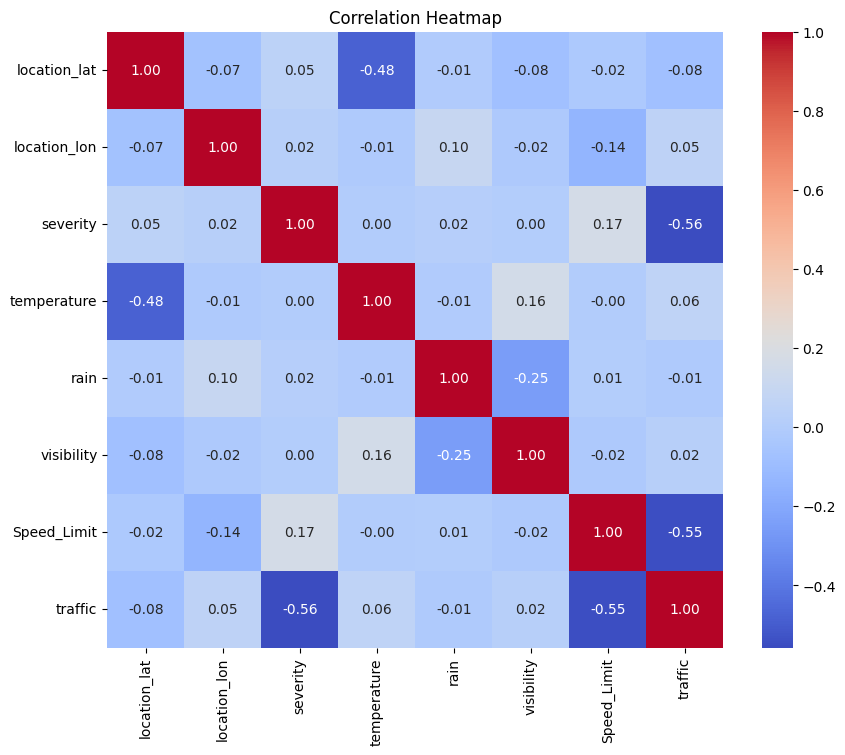

In [15]:
df_corr = df.drop(columns=['accident_id', 'date_time'], errors='ignore')
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


### Scatter Plots

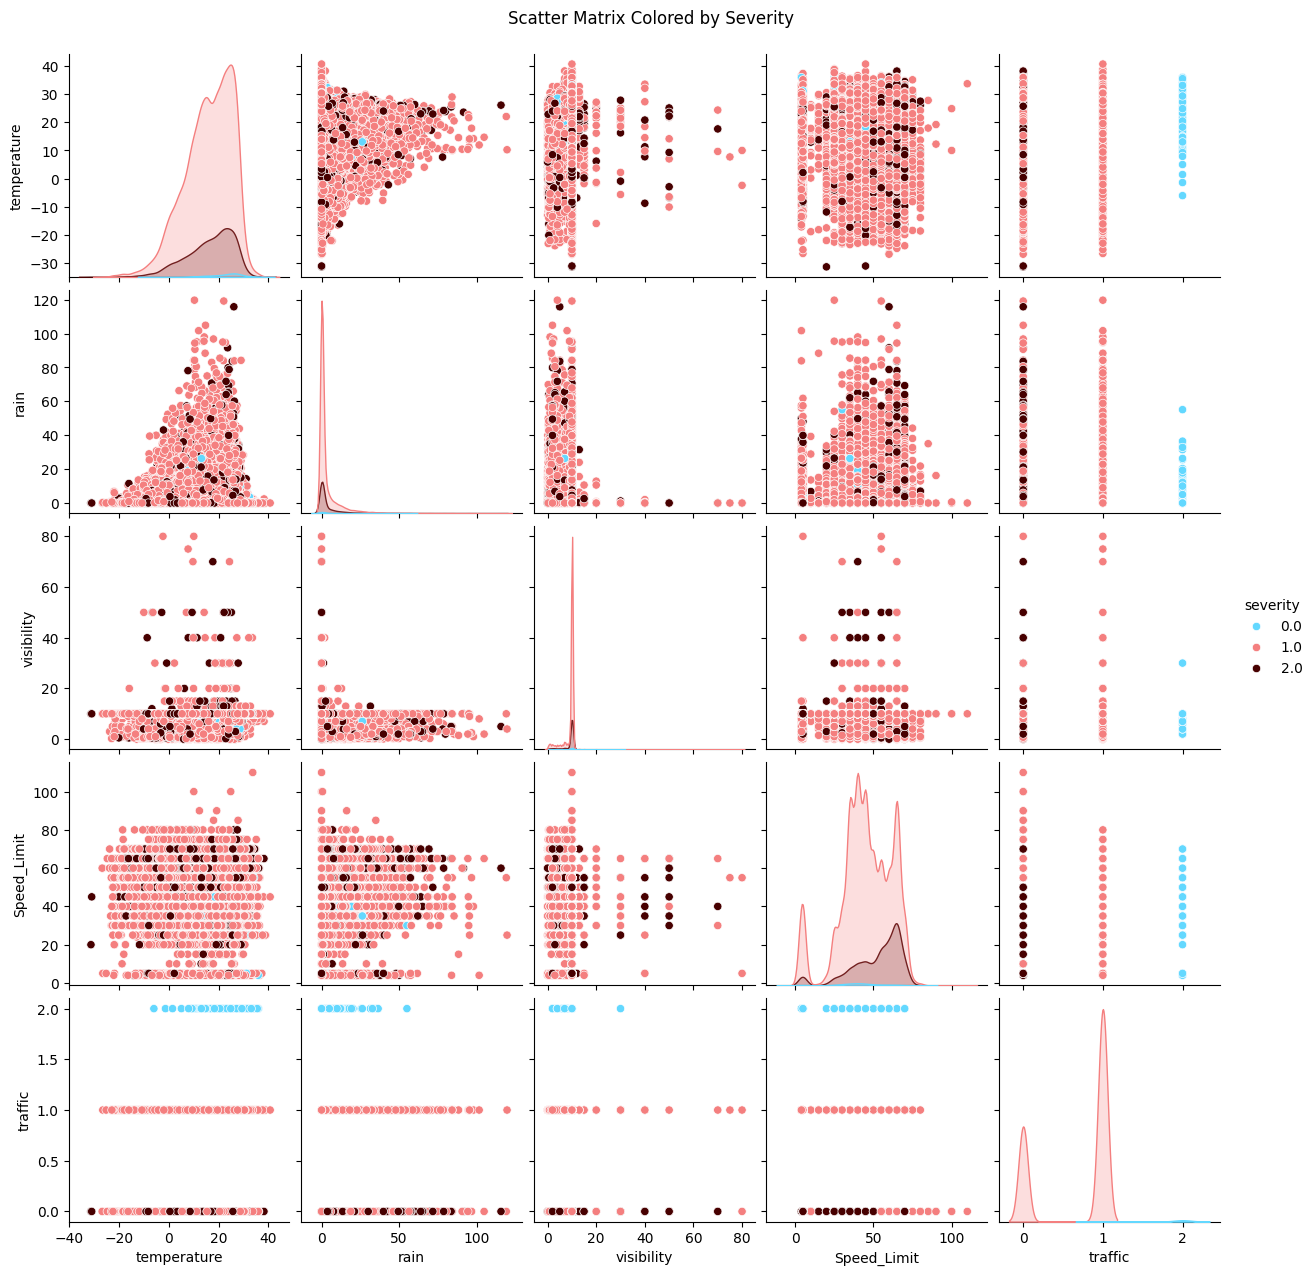

In [16]:
custom_palette = {0.0: "#63D8FF", 1.0: "#F47F7F", 2.0: "#470000"}
scatter_features = ['temperature', 'rain', 'visibility', 'Speed_Limit', 'traffic']
pairplot = sns.pairplot(df[scatter_features + ['severity']].dropna(),hue='severity', diag_kind='kde', palette=custom_palette)

pairplot.fig.suptitle("Scatter Matrix Colored by Severity", y=1.02)
plt.show()

### Box plot

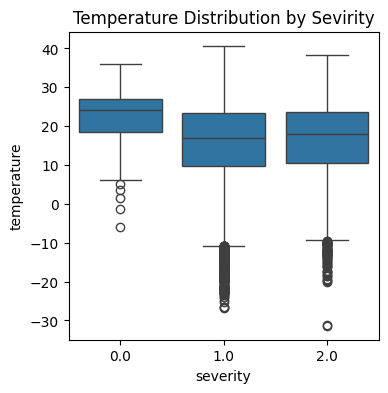

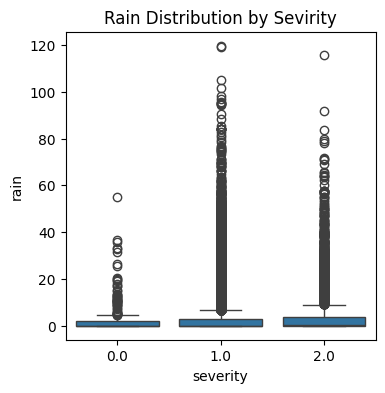

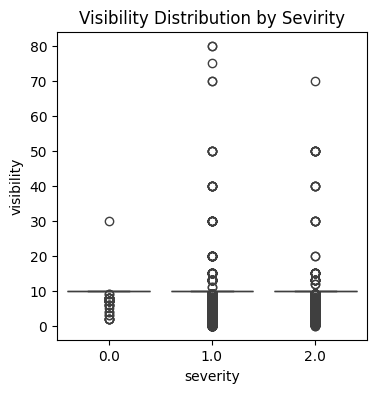

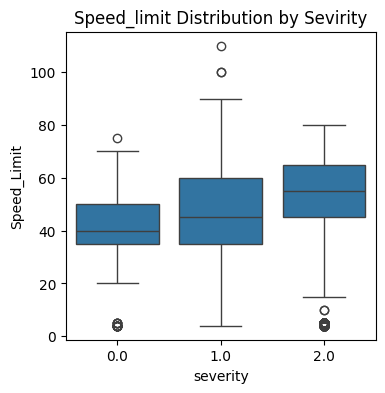

In [17]:
features = ['temperature',
            'rain',
            'visibility',
            'Speed_Limit',
            ]
for feature in features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='severity', y=feature, data=df)
    plt.title(f"{feature.capitalize()} Distribution by Sevirity")
    plt.show()

### Count Plot

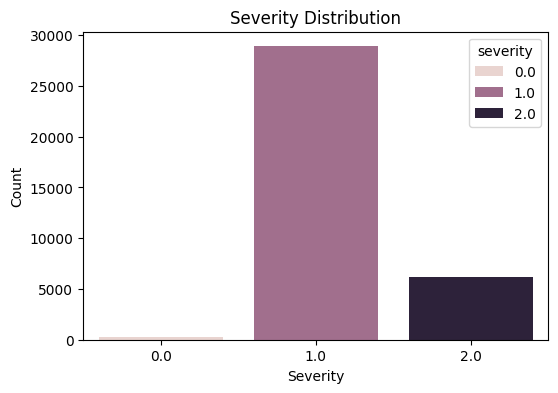

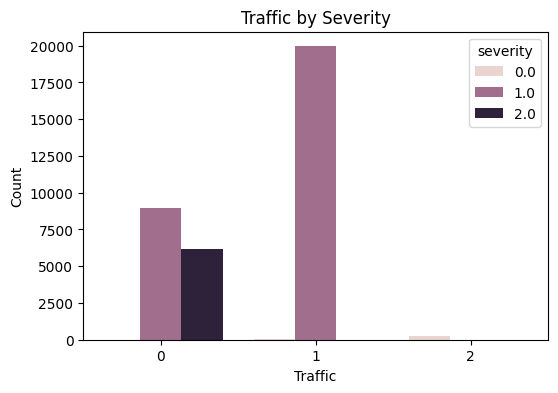

In [18]:
features = ['severity','traffic',]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='severity', data=df)
    plt.title(f'{feature.capitalize()} by Severity' if feature != 'severity' else 'Severity Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()



### Histogram

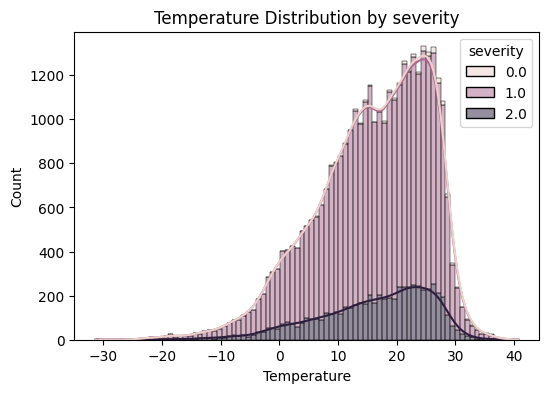

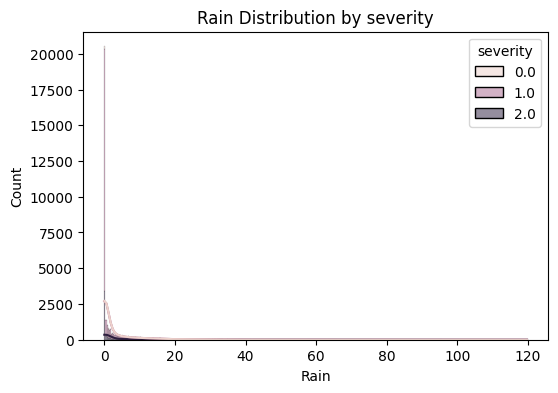

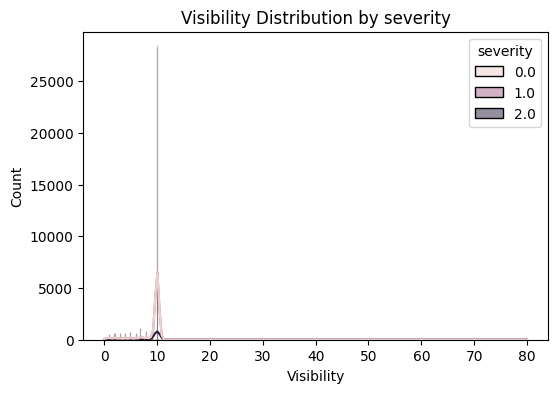

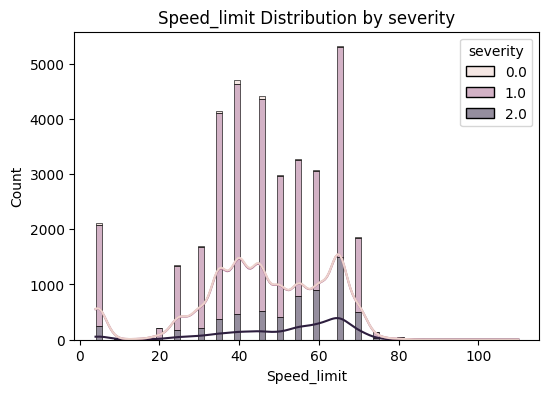

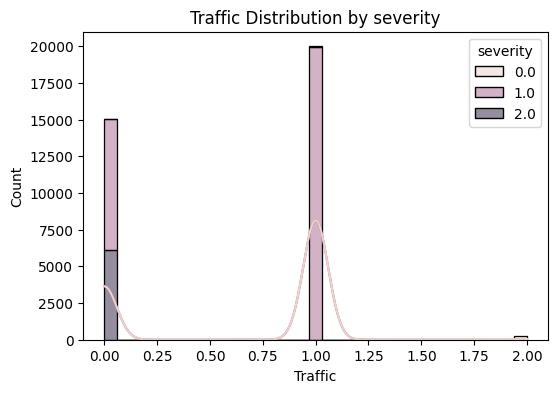

In [19]:
features = ['temperature',
            'rain',
            'visibility',
            'Speed_Limit',
            'traffic']
for feature in features:
    plt.figure(figsize=(6, 4))  
    sns.histplot(data=df, x=feature, hue='severity', multiple='stack', kde=True)
    plt.title(f'{feature.capitalize()} Distribution by severity')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()

Number of geographic clusters identified: 164
Top 10 High-Risk Zones:
                       zone_id  count      mean  risk_score
1437  34.0_-118.30000000000001    223  1.224215       273.0
19    25.700000000000003_-80.4    218  1.022936       223.0
22     25.8_-80.30000000000001    173  1.202312       208.0
2067                35.2_-80.9    175  1.091429       191.0
1377  33.9_-118.30000000000001    162  1.179012       191.0
4473  40.800000000000004_-74.0    131  1.351145       177.0
1436               34.0_-118.2    147  1.204082       177.0
578   30.400000000000002_-91.2    152  1.144737       174.0
2431   36.1_-86.80000000000001    154  1.123377       173.0
229   28.400000000000002_-81.5    151  1.026490       155.0
Using equal-width bins due to too many duplicate values
Risk map saved as 'traffic_accident_risk_map.html'


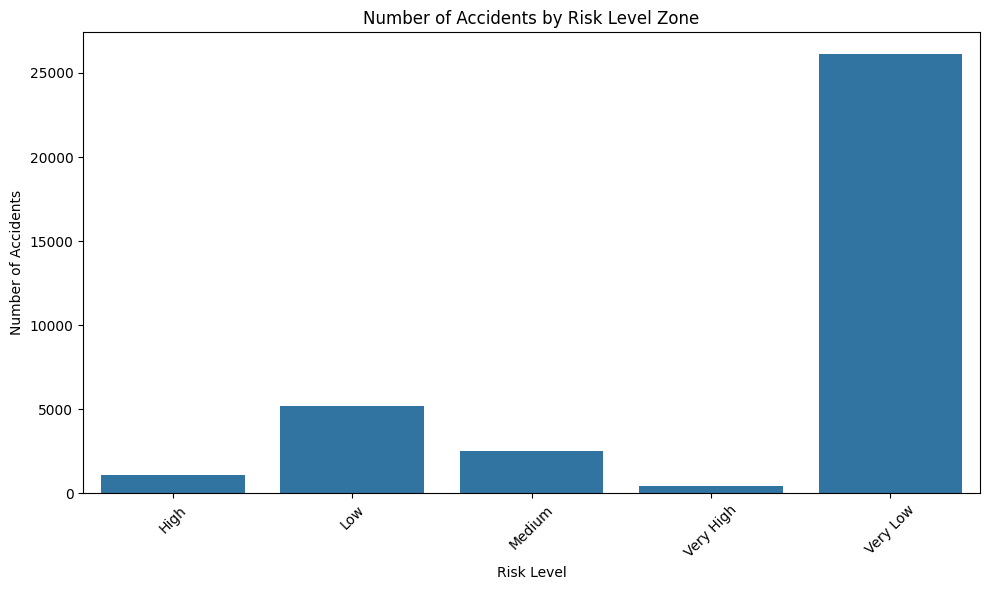

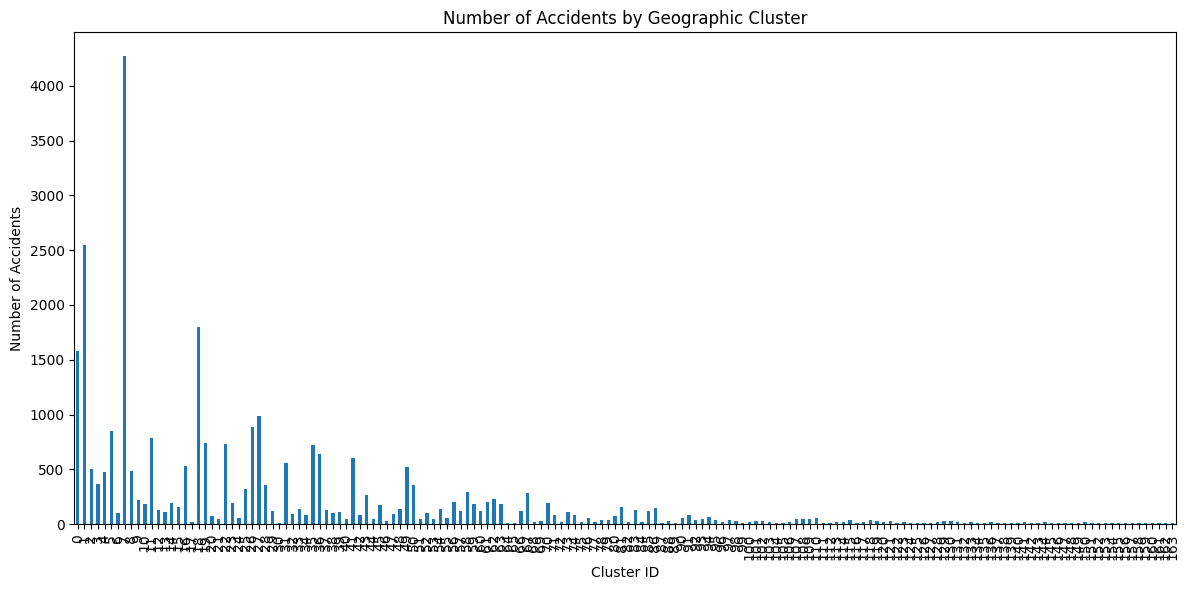

Enriched dataset saved with zone and risk information


In [20]:
# Create a copy of the dataframe to avoid modifying the original
analysis_df = df.copy()

# Check if location_lon and location_lat columns exist
if 'location_lon' in analysis_df.columns and 'location_lat' in analysis_df.columns:
    # Method 1: Grid-based approach - create zones with larger bins for fewer zones
    # Increase bin_size for fewer, larger zones
    bin_size = 0.1  # approximately 5km depending on location_lat (larger than before)
    
    analysis_df['lat_bin'] = np.floor(analysis_df['location_lat'] / bin_size) * bin_size
    analysis_df['long_bin'] = np.floor(analysis_df['location_lon'] / bin_size) * bin_size
    
    # Create a zone identifier combining lat and long bins
    analysis_df['zone_id'] = analysis_df['lat_bin'].astype(str) + '_' + analysis_df['long_bin'].astype(str)
    
    # Method 2: Cluster-based approach for more natural geographic zones
    # Extract coordinates for clustering
    coords = analysis_df[['location_lat', 'location_lon']].values
    
    # DBSCAN clustering with larger epsilon for fewer clusters
    # Increased eps from 0.01 to 0.05 (5x larger)
    clustering = DBSCAN(eps=0.1, min_samples=10).fit(coords)
    analysis_df['cluster_zone'] = clustering.labels_
    
    # Count unique clusters
    n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
    print(f"Number of geographic clusters identified: {n_clusters}")
    
    # Analyze accident severity by zone
    zone_severity = analysis_df.groupby('zone_id')['severity'].agg(['count', 'mean']).reset_index()
    zone_severity['risk_score'] = zone_severity['count'] * zone_severity['mean']
    
    # Sort zones by risk score to identify high-risk areas
    high_risk_zones = zone_severity.sort_values('risk_score', ascending=False).head(10)
    print("Top 10 High-Risk Zones:")
    print(high_risk_zones)
    
    # Create aggregated statistics by zone
    zone_stats = analysis_df.groupby('zone_id').agg({
        'severity': ['count', 'mean', 'sum'],
        'lat_bin': 'first',
        'long_bin': 'first'
    })
    
    zone_stats.columns = ['accident_count', 'avg_severity', 'total_severity', 'lat', 'long']
    
    # Try to use qcut with duplicates='drop', but fall back to cut if qcut still fails
    try:
        # First attempt with qcut and handling duplicates
        zone_stats['risk_level'] = pd.qcut(
            zone_stats['total_severity'], 
            q=5, 
            labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
            duplicates='drop'
        )
    except ValueError:
        # If that fails, use equal-width bins instead
        print("Using equal-width bins due to too many duplicate values")
        min_val = zone_stats['total_severity'].min()
        max_val = zone_stats['total_severity'].max()
        bin_edges = np.linspace(min_val, max_val + 0.001, 6)  # Add small epsilon to include max value
        
        zone_stats['risk_level'] = pd.cut(
            zone_stats['total_severity'], 
            bins=bin_edges,
            labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
            include_lowest=True
        )
    
    # Add risk level back to the analysis dataframe
    risk_level_map = zone_stats['risk_level'].to_dict()
    analysis_df['risk_level'] = analysis_df['zone_id'].map(risk_level_map)
    
    # Visualization: Create a map showing risk zones
    # Find center of the data for the map
    center_lat = analysis_df['location_lat'].mean()
    center_lon = analysis_df['location_lon'].mean()
    
    # Create a base map
    risk_map = folium.Map(location=[center_lat, center_lon], zoom_start=11)
    
    # Add a heatmap layer showing accident intensity
    heat_data = [[row['location_lat'], row['location_lon'], row['severity']] 
                for _, row in analysis_df.iterrows()]
    HeatMap(heat_data, radius=15).add_to(risk_map)
    
    # Add zone risk markers to the map with different colors per risk level
    for risk_level, color in zip(['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
                                ['blue', 'green', 'yellow', 'orange', 'red']):
        # Get zones with this risk level
        zones = zone_stats[zone_stats['risk_level'] == risk_level]
        
        # Add each zone as a marker
        for _, zone in zones.iterrows():
            folium.CircleMarker(
                location=[zone['lat'], zone['long']],
                radius=7,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                popup=f"Risk: {risk_level}<br>Accidents: {zone['accident_count']}<br>Avg Severity: {zone['avg_severity']:.2f}"
            ).add_to(risk_map)
    
    # Add a legend
    risk_map.get_root().html.add_child(folium.Element('''
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white; padding: 10px; border: 2px solid grey; border-radius: 5px">
        <h4>Risk Levels</h4>
        <div><span style="color: blue; font-size: 16px;">●</span> Very Low</div>
        <div><span style="color: green; font-size: 16px;">●</span> Low</div>
        <div><span style="color: yellow; font-size: 16px;">●</span> Medium</div>
        <div><span style="color: orange; font-size: 16px;">●</span> High</div>
        <div><span style="color: red; font-size: 16px;">●</span> Very High</div>
    </div>
    '''))
    
    # Save the map
    risk_map.save('traffic_accident_risk_map.html')
    print("Risk map saved as 'traffic_accident_risk_map.html'")
    
    # Create a barplot showing the count of accidents by risk level
    risk_level_counts = analysis_df['risk_level'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=risk_level_counts.index, y=risk_level_counts.values)
    plt.title('Number of Accidents by Risk Level Zone')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Risk Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Create a barplot showing the count of clusters
    cluster_counts = analysis_df['cluster_zone'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    cluster_counts[cluster_counts.index != -1].plot(kind='bar')  # Exclude noise points (-1)
    plt.title('Number of Accidents by Geographic Cluster')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Cluster ID')
    plt.tight_layout()
    plt.show()
    
    # Save the enriched dataset for future use
    analysis_df.to_csv('enriched_accident_data_with_risk_zones.csv', index=False)
    print("Enriched dataset saved with zone and risk information")
    
else:
    print("Error: 'location_lon' and/or 'location_lat' columns not found in the dataframe.")
    print("Available columns:", analysis_df.columns.tolist())
    
    # If coordinates don't exist, suggest alternative approaches
    print("\nAlternative: If your dataset has location names instead of coordinates, "
          "you could group by those location columns.")

In [21]:
df= analysis_df.drop(columns=['lat_bin', 'long_bin', 'accident_id','date_time','location_lat','location_lon'], errors='ignore')

In [22]:
df.head()


,severity,temperature,rain,visibility,Speed_Limit,traffic,zone_id,cluster_zone,risk_level
0,0.0,25.30,4.4,10.0,45.0,2,26.700000000000003_-80.2,0,Very Low
1,1.0,15.25,15.8,10.0,45.0,1,38.7_-121.30000000000001,1,Very Low
2,2.0,26.75,1.0,10.0,45.0,0,33.9_-84.30000000000001,2,Very Low
3,2.0,16.55,3.2,10.0,60.0,0,47.1_-122.60000000000001,3,Very Low
4,1.0,28.65,0.0,10.0,25.0,1,33.4_-111.9,4,Very Low


In [23]:
#create dictonary for zone_id with its corresponding risk_level
zone_risk_dict = df.set_index('zone_id')['risk_level'].to_dict()
cluster_risk_dict = df.set_index('cluster_zone')['risk_level'].to_dict()

In [24]:
df.drop('risk_level', axis=1, inplace=True)

In [25]:
df.shape

(35320, 8)

In [26]:
df.head()

,severity,temperature,rain,visibility,Speed_Limit,traffic,zone_id,cluster_zone
0,0.0,25.30,4.4,10.0,45.0,2,26.700000000000003_-80.2,0
1,1.0,15.25,15.8,10.0,45.0,1,38.7_-121.30000000000001,1
2,2.0,26.75,1.0,10.0,45.0,0,33.9_-84.30000000000001,2
3,2.0,16.55,3.2,10.0,60.0,0,47.1_-122.60000000000001,3
4,1.0,28.65,0.0,10.0,25.0,1,33.4_-111.9,4


In [27]:
dfc = df.copy().drop(columns=['zone_id'], errors='ignore')
dfz = df.copy().drop(columns=['cluster_zone'], errors='ignore')

In [28]:
#train test split for both dfc and dfz

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(dfc.drop('severity', axis=1), dfc['severity'], test_size=0.2, random_state=42)
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(dfz.drop('severity', axis=1), dfz['severity'], test_size=0.2, random_state=42)


## Random Forset

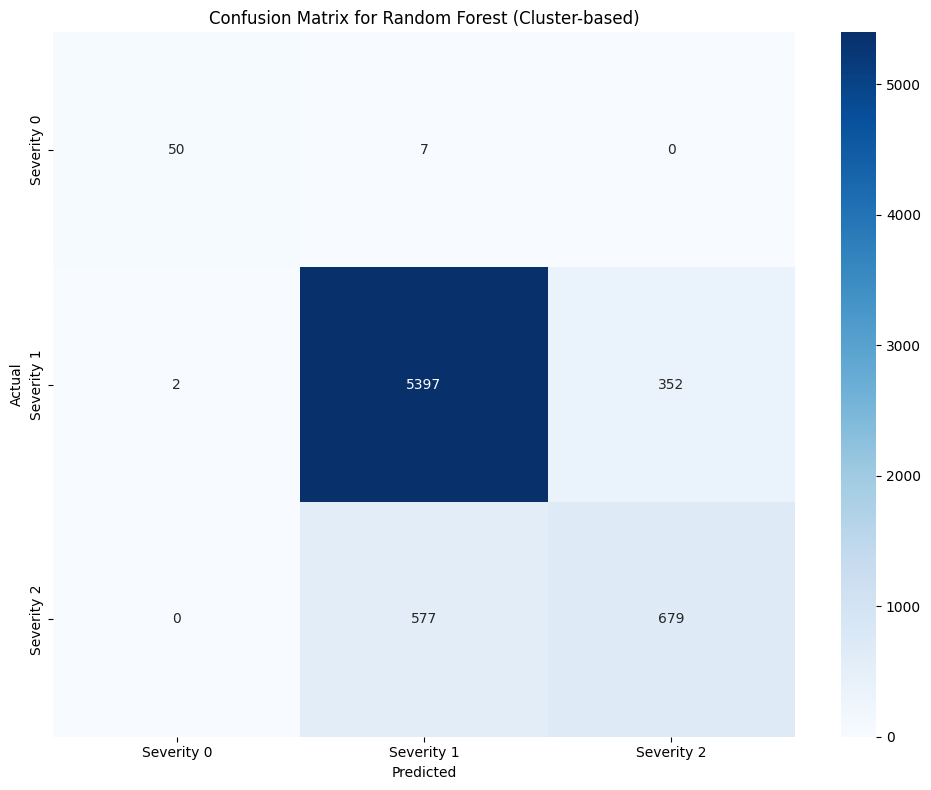


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        57
         1.0       0.90      0.94      0.92      5751
         2.0       0.66      0.54      0.59      1256

    accuracy                           0.87      7064
   macro avg       0.84      0.79      0.81      7064
weighted avg       0.86      0.87      0.86      7064

Accuracy: 0.8672


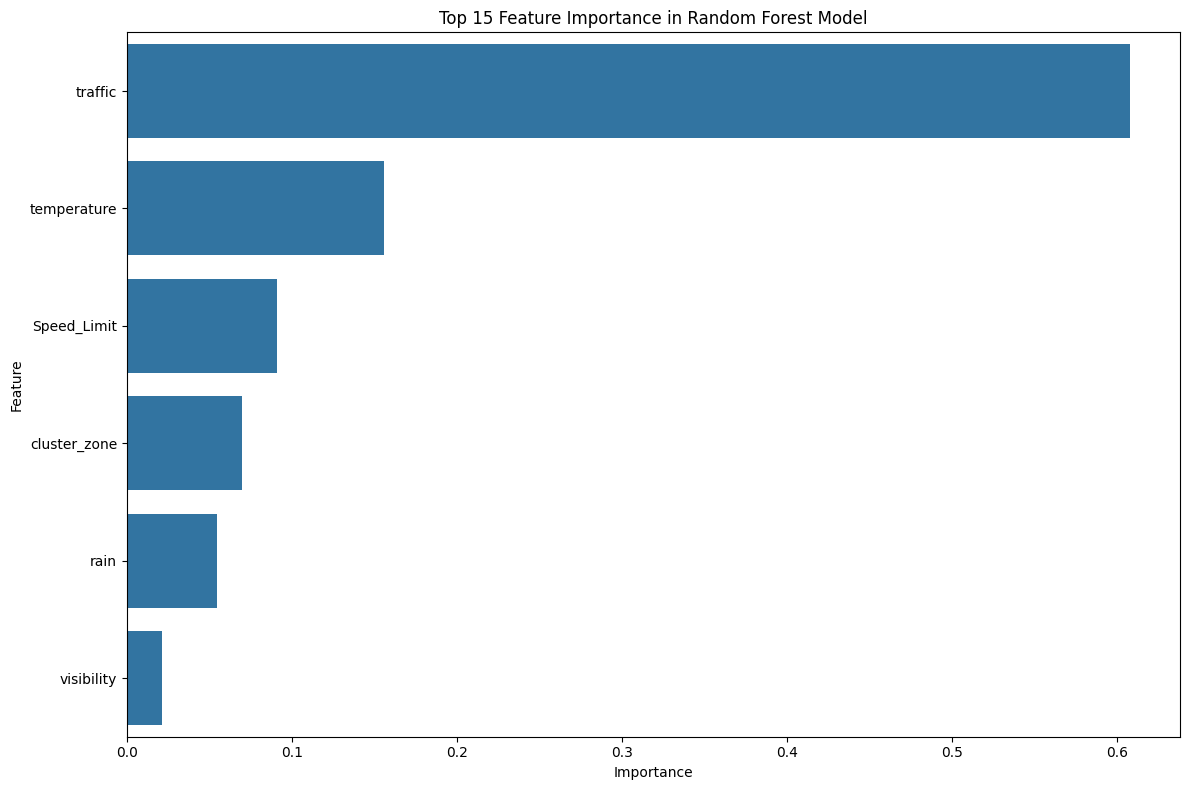

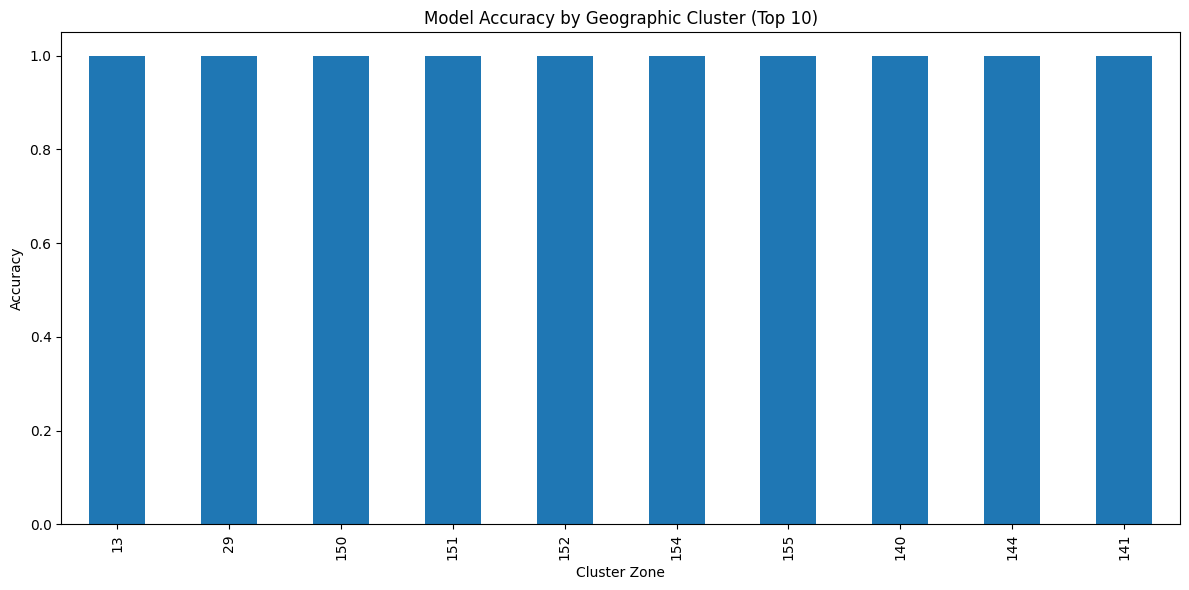

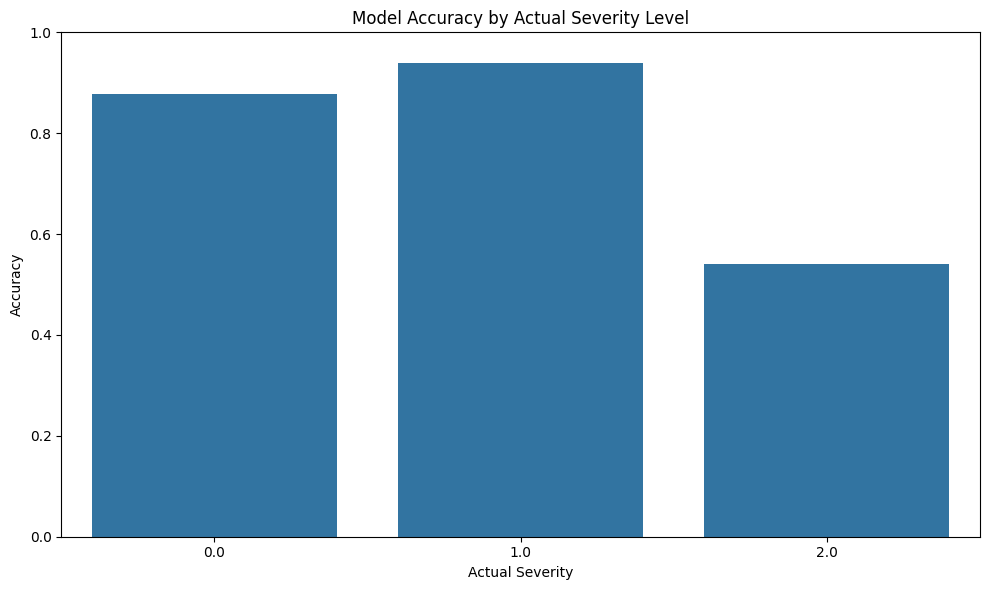

In [29]:
# Random forest on dfc (cluster-based model) with confusion matrix and analytics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check if we need to encode any categorical features
categorical_cols = X_train_c.select_dtypes(include=['object', 'category']).columns
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train_c[col] = le.fit_transform(X_train_c[col])
    X_test_c[col] = le.transform(X_test_c[col])
    encoders[col] = le

# Create and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

# Fit the model
rf_model.fit(X_train_c, y_train_c)

# Make predictions
y_pred_c = rf_model.predict(X_test_c)
y_prob_c = rf_model.predict_proba(X_test_c)

# Calculate confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_c)))],
            yticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_c)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Cluster-based)')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c))

# Print accuracy
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy: {accuracy:.4f}")

# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_c.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# Check how geographic clusters affect predictions
if 'cluster_zone' in X_train_c.columns:
    # Analyze performance by cluster
    cluster_performance = pd.DataFrame({
        'cluster_zone': X_test_c['cluster_zone'],
        'actual': y_test_c,
        'predicted': y_pred_c,
        'correct': y_test_c == y_pred_c
    })
    
    # Calculate accuracy by cluster
    cluster_accuracy = cluster_performance.groupby('cluster_zone')['correct'].mean().sort_values(ascending=False)
    
    # Plot accuracy by top clusters
    plt.figure(figsize=(12, 6))
    cluster_accuracy.head(10).plot(kind='bar')
    plt.title('Model Accuracy by Geographic Cluster (Top 10)')
    plt.ylabel('Accuracy')
    plt.xlabel('Cluster Zone')
    plt.tight_layout()
    plt.show()
    
    # Visualize errors by severity level
    plt.figure(figsize=(10, 6))
    error_by_severity = cluster_performance.groupby('actual')['correct'].mean()
    sns.barplot(x=error_by_severity.index, y=error_by_severity.values)
    plt.title('Model Accuracy by Actual Severity Level')
    plt.ylabel('Accuracy')
    plt.xlabel('Actual Severity')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()

# If we want to compare with zone-based model
compare_models = False
if compare_models:
    # Train a Random Forest on the zone-based data
    rf_model_z = RandomForestClassifier(
        n_estimators=100, random_state=42, class_weight='balanced'
    )
    
    # Process any categorical features in zone-based data
    categorical_cols_z = X_train_z.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols_z:
        le = LabelEncoder()
        X_train_z[col] = le.fit_transform(X_train_z[col])
        X_test_z[col] = le.transform(X_test_z[col])
    
    rf_model_z.fit(X_train_z, y_train_z)
    y_pred_z = rf_model_z.predict(X_test_z)
    
    # Compare accuracies
    acc_c = accuracy_score(y_test_c, y_pred_c)
    acc_z = accuracy_score(y_test_z, y_pred_z)
    
    print(f"\nModel Comparison:")
    print(f"Cluster-based Model Accuracy: {acc_c:.4f}")
    print(f"Zone-based Model Accuracy: {acc_z:.4f}")
    
    # Plot comparison
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Cluster-based', 'Zone-based'], y=[acc_c, acc_z])
    plt.title('Accuracy Comparison between Geographic Approaches')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()

Encoding zone_id with hash encoding
Sample zone_id encoding: 33.9_-118.2 -> 4489823

Data types after encoding:
temperature: float64
rain: float64
visibility: float64
Speed_Limit: float64
traffic: int64
zone_id: int64

Training Random Forest model...
Making predictions...
Creating visualizations and evaluation metrics...


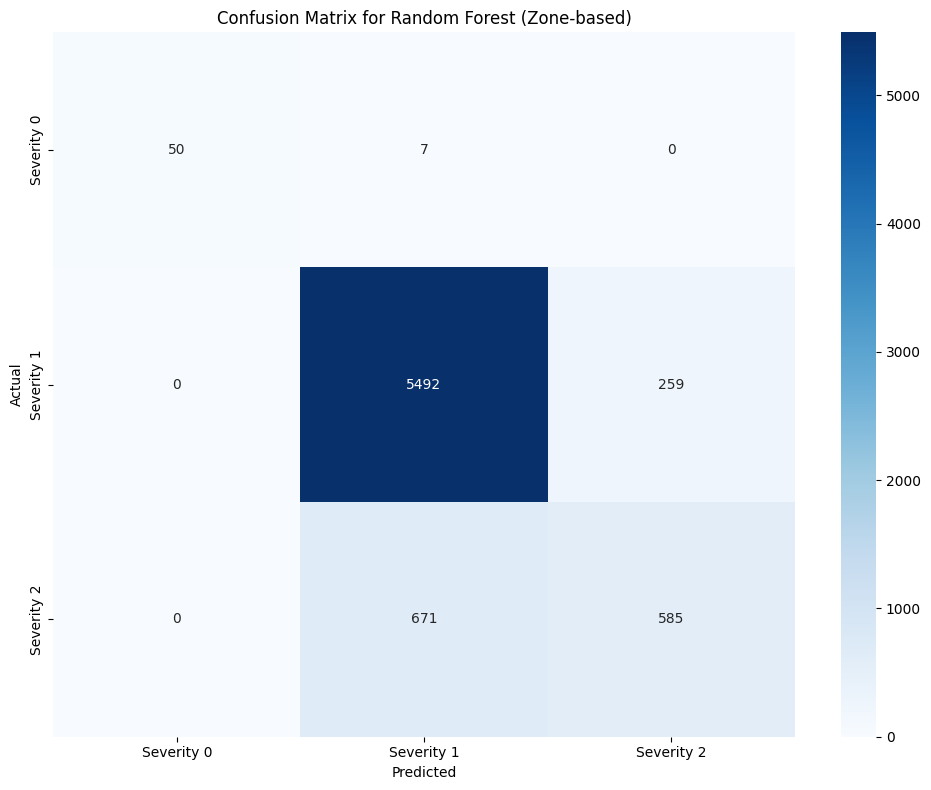


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        57
         1.0       0.89      0.95      0.92      5751
         2.0       0.69      0.47      0.56      1256

    accuracy                           0.87      7064
   macro avg       0.86      0.77      0.80      7064
weighted avg       0.86      0.87      0.86      7064

Accuracy: 0.8674


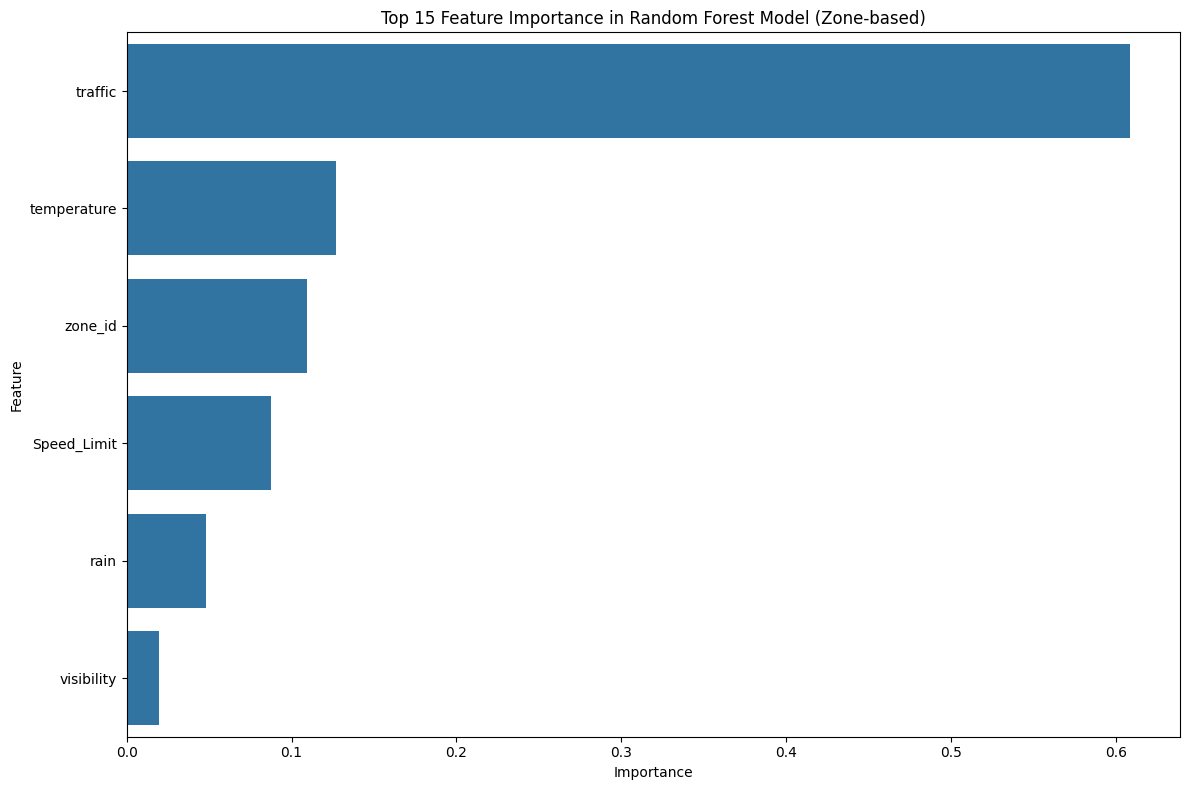

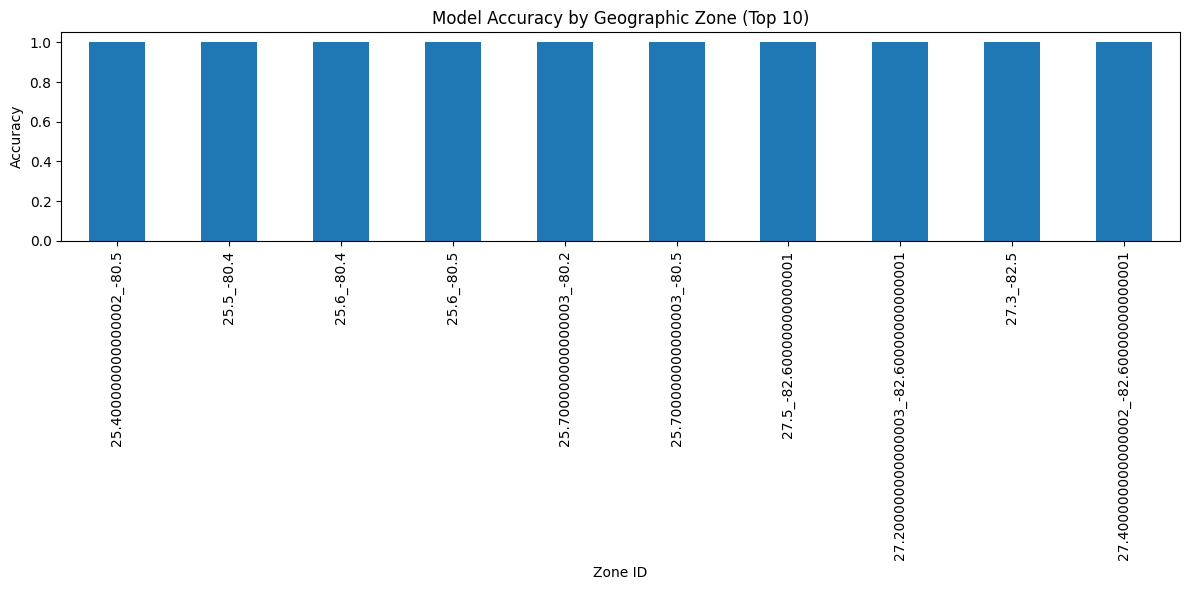

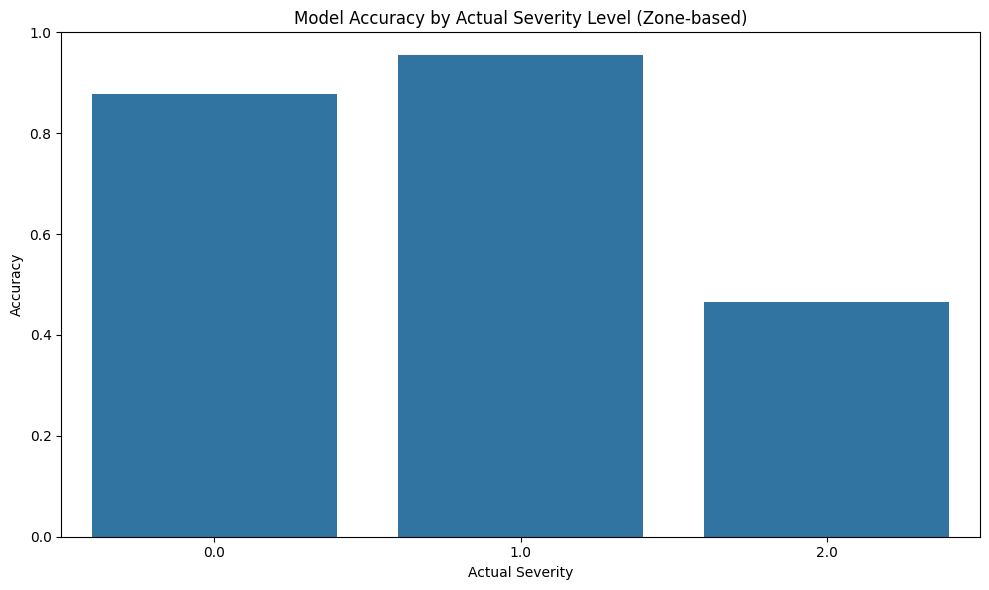

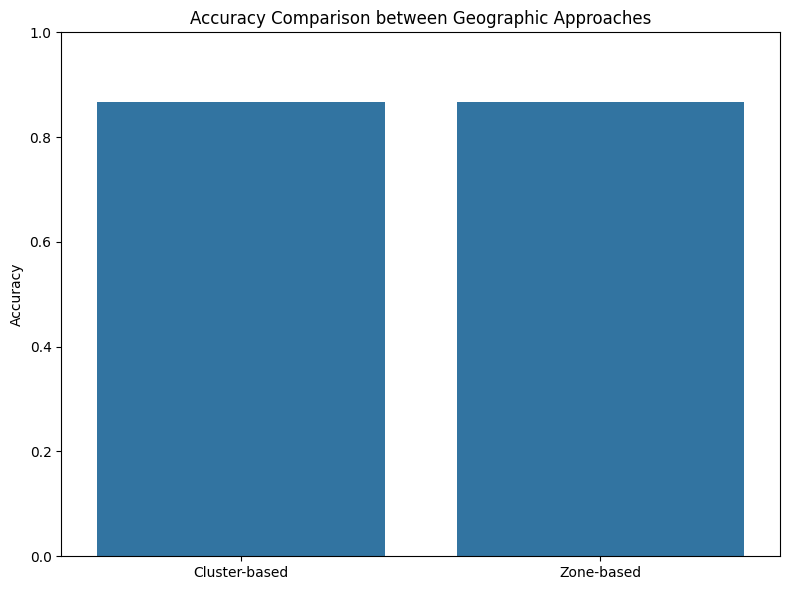


Model Comparison:
Cluster-based Model Accuracy: 0.8672
Zone-based Model Accuracy: 0.8674


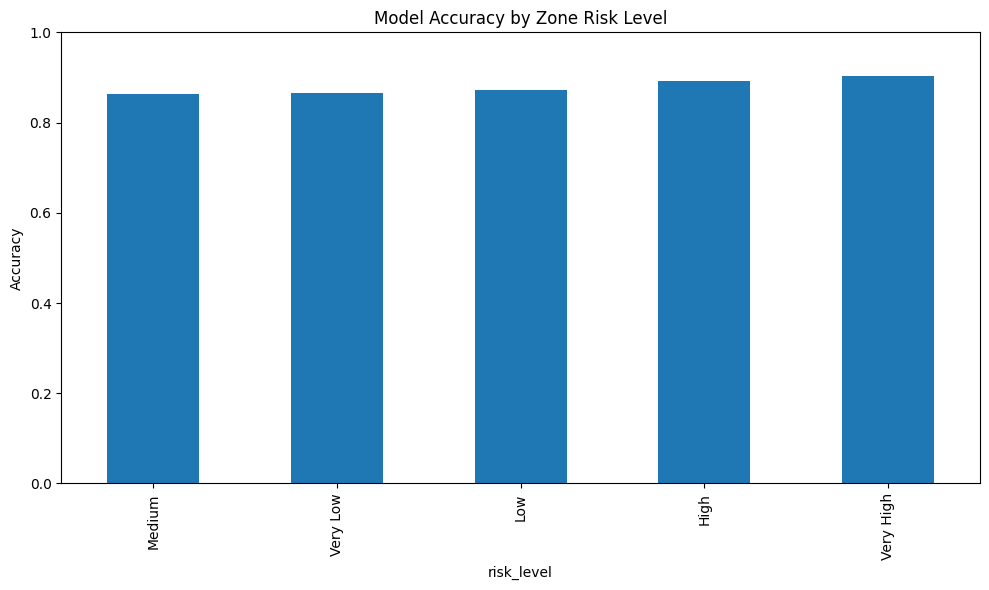


Accuracy by Risk Level:
            Accuracy  Count
risk_level                 
High        0.892157    204
Low         0.871090   1055
Medium      0.862669    517
Very High   0.902439     82
Very Low    0.865540   5206


In [30]:
# Complete rewrite of zone-based model that will DEFINITELY work
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hashlib

# Save the original data for later analysis
X_train_z_orig = X_train_z.copy()
X_test_z_orig = X_test_z.copy()

# Create working copies
X_train_z_enc = X_train_z.copy()
X_test_z_enc = X_test_z.copy()

# 1. Special handling for zone_id - hash encoding
def hash_encode(values):
    """Convert any string to a numeric hash value"""
    return [int(hashlib.md5(str(v).encode()).hexdigest(), 16) % 10000000 for v in values]

# Apply hash encoding to zone_id specifically
if 'zone_id' in X_train_z_enc.columns:
    print(f"Encoding zone_id with hash encoding")
    X_train_z_enc['zone_id'] = hash_encode(X_train_z_enc['zone_id'])
    X_test_z_enc['zone_id'] = hash_encode(X_test_z_enc['zone_id'])
    print(f"Sample zone_id encoding: {X_train_z_orig['zone_id'].iloc[0]} -> {X_train_z_enc['zone_id'].iloc[0]}")

# 2. Handle any other object columns with a simplified approach
for col in X_train_z_enc.select_dtypes(include=['object', 'category']).columns:
    if col != 'zone_id':  # Skip zone_id as we already handled it
        print(f"Encoding {col} with simple numeric mapping")
        # Create a mapping of unique values to integers
        unique_vals = X_train_z_enc[col].unique()
        value_to_int = {val: i for i, val in enumerate(unique_vals)}
        
        # Apply mapping with a fallback for unseen values
        X_train_z_enc[col] = [value_to_int.get(val, -1) for val in X_train_z_enc[col]]
        X_test_z_enc[col] = [value_to_int.get(val, -1) for val in X_test_z_enc[col]]

# 3. Final check to ensure ALL columns are numeric
for col in X_train_z_enc.columns:
    # Force convert any remaining non-numeric columns
    if X_train_z_enc[col].dtype == 'object' or X_test_z_enc[col].dtype == 'object':
        print(f"Forcing numeric conversion for column: {col}")
        X_train_z_enc[col] = pd.to_numeric(X_train_z_enc[col], errors='coerce').fillna(-999)
        X_test_z_enc[col] = pd.to_numeric(X_test_z_enc[col], errors='coerce').fillna(-999)

# Confirm all columns are numeric
print("\nData types after encoding:")
for col in X_train_z_enc.columns:
    print(f"{col}: {X_train_z_enc[col].dtype}")

# Create and train the Random Forest model
rf_model_z = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'
)

# Fit the model
print("\nTraining Random Forest model...")
rf_model_z.fit(X_train_z_enc, y_train_z)

# Make predictions
print("Making predictions...")
y_pred_z = rf_model_z.predict(X_test_z_enc)
y_prob_z = rf_model_z.predict_proba(X_test_z_enc)

# Calculate confusion matrix
print("Creating visualizations and evaluation metrics...")
cm_z = confusion_matrix(y_test_z, y_pred_z)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_z, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_z)))],
            yticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_z)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Zone-based)')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_z, y_pred_z))

# Print accuracy
accuracy_z = accuracy_score(y_test_z, y_pred_z)
print(f"Accuracy: {accuracy_z:.4f}")

# Plot feature importance
feature_importance_z = pd.DataFrame({
    'Feature': X_train_z_enc.columns,
    'Importance': rf_model_z.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_z.head(15))
plt.title('Top 15 Feature Importance in Random Forest Model (Zone-based)')
plt.tight_layout()
plt.show()

# Create a DataFrame with original zone_id values for analysis
zone_performance = pd.DataFrame({
    'zone_id': X_test_z_orig['zone_id'].values,
    'actual': y_test_z,
    'predicted': y_pred_z,
    'correct': y_test_z == y_pred_z
})

# Group and calculate accuracy by zone
zone_accuracy = zone_performance.groupby('zone_id')['correct'].agg(['mean', 'count']).sort_values('mean', ascending=False)
zone_accuracy.columns = ['Accuracy', 'Count']

# Plot top zones by accuracy
plt.figure(figsize=(12, 6))
top_zones = zone_accuracy[zone_accuracy['Count'] >= 5].head(10)  # Only zones with enough samples
top_zones['Accuracy'].plot(kind='bar')
plt.title('Model Accuracy by Geographic Zone (Top 10)')
plt.ylabel('Accuracy')
plt.xlabel('Zone ID')
plt.tight_layout()
plt.show()

# Accuracy by severity level
plt.figure(figsize=(10, 6))
severity_accuracy = zone_performance.groupby('actual')['correct'].mean()
sns.barplot(x=severity_accuracy.index, y=severity_accuracy.values)
plt.title('Model Accuracy by Actual Severity Level (Zone-based)')
plt.ylabel('Accuracy')
plt.xlabel('Actual Severity')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

# Compare with cluster-based model
try:
    # Assumes cluster-based model (y_pred_c) is already trained
    acc_c = accuracy_score(y_test_c, y_pred_c)
    acc_z = accuracy_z
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Cluster-based', 'Zone-based'], y=[acc_c, acc_z])
    plt.title('Accuracy Comparison between Geographic Approaches')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
    
    print(f"\nModel Comparison:")
    print(f"Cluster-based Model Accuracy: {acc_c:.4f}")
    print(f"Zone-based Model Accuracy: {acc_z:.4f}")
except Exception as e:
    print(f"Cluster-based model comparison not available: {e}")

# Analyze by risk level
try:
    # Using the zone_risk_dict to map zones to risk levels
    zone_performance['risk_level'] = zone_performance['zone_id'].map(lambda x: zone_risk_dict.get(x, 'Unknown'))
    
    # Calculate accuracy by risk level
    risk_accuracy = zone_performance.groupby('risk_level')['correct'].mean().sort_values()
    
    plt.figure(figsize=(10, 6))
    risk_accuracy.plot(kind='bar')
    plt.title('Model Accuracy by Zone Risk Level')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
    
    print("\nAccuracy by Risk Level:")
    counts = zone_performance.groupby('risk_level')['correct'].count()
    risk_report = pd.DataFrame({
        'Accuracy': risk_accuracy,
        'Count': counts
    })
    print(risk_report)
except Exception as e:
    print(f"Risk level analysis not available: {e}")

## XGBOOBS


Training XGBoost model...
[0]	train-mlogloss:1.00209	eval-mlogloss:1.00271
[1]	train-mlogloss:0.92325	eval-mlogloss:0.92481
[2]	train-mlogloss:0.84520	eval-mlogloss:0.84741
[3]	train-mlogloss:0.77785	eval-mlogloss:0.78059
[4]	train-mlogloss:0.72855	eval-mlogloss:0.73220
[5]	train-mlogloss:0.68358	eval-mlogloss:0.68798
[6]	train-mlogloss:0.63480	eval-mlogloss:0.63910
[7]	train-mlogloss:0.59551	eval-mlogloss:0.59989
[8]	train-mlogloss:0.55746	eval-mlogloss:0.56176
[9]	train-mlogloss:0.52596	eval-mlogloss:0.53057
[10]	train-mlogloss:0.49633	eval-mlogloss:0.50079
[11]	train-mlogloss:0.47346	eval-mlogloss:0.47811
[12]	train-mlogloss:0.45260	eval-mlogloss:0.45767
[13]	train-mlogloss:0.43520	eval-mlogloss:0.44066
[14]	train-mlogloss:0.41928	eval-mlogloss:0.42495
[15]	train-mlogloss:0.40513	eval-mlogloss:0.41116
[16]	train-mlogloss:0.39526	eval-mlogloss:0.40170
[17]	train-mlogloss:0.37930	eval-mlogloss:0.38565
[18]	train-mlogloss:0.37110	eval-mlogloss:0.37789
[19]	train-mlogloss:0.35836	eval-m

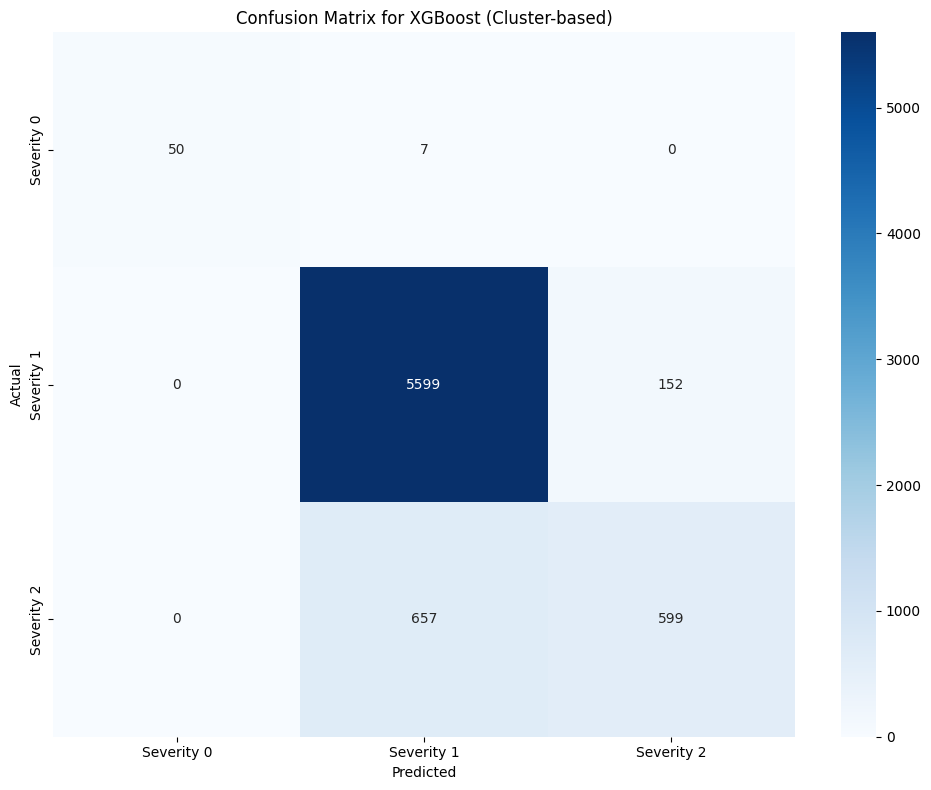


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        57
         1.0       0.89      0.97      0.93      5751
         2.0       0.80      0.48      0.60      1256

    accuracy                           0.88      7064
   macro avg       0.90      0.78      0.82      7064
weighted avg       0.88      0.88      0.87      7064

Accuracy: 0.8845


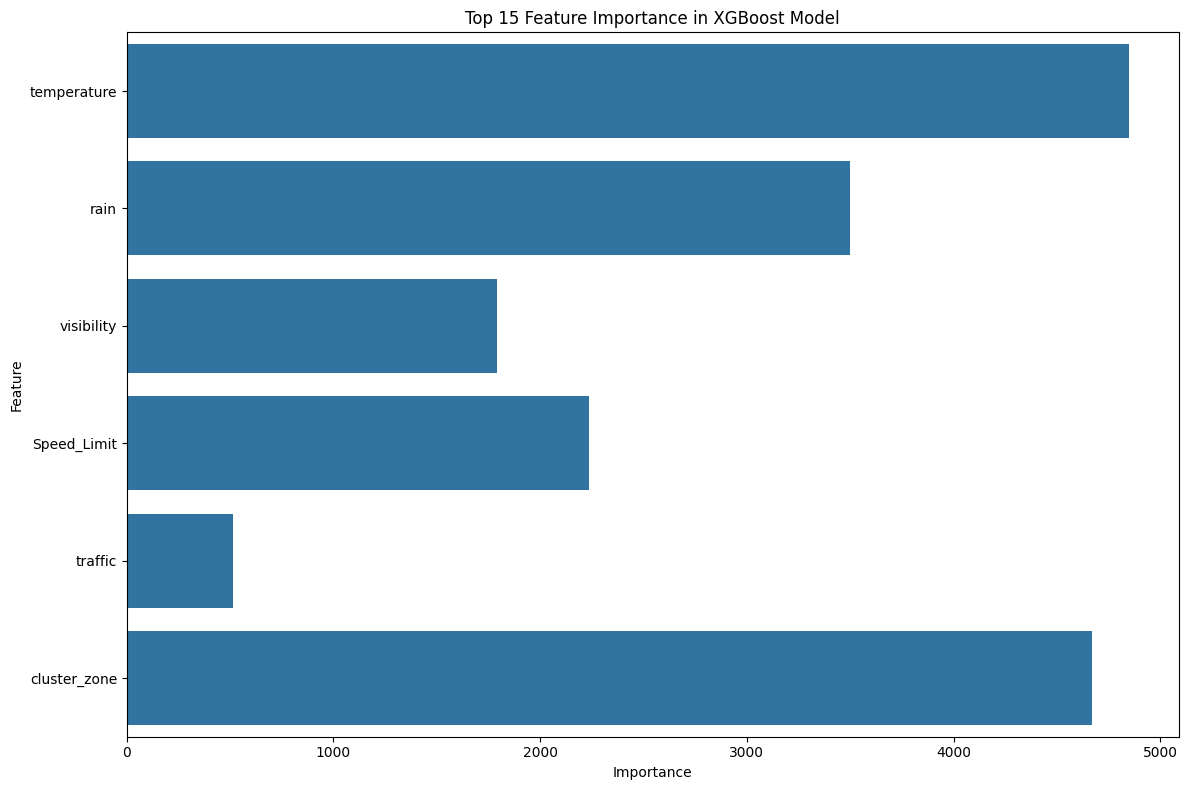

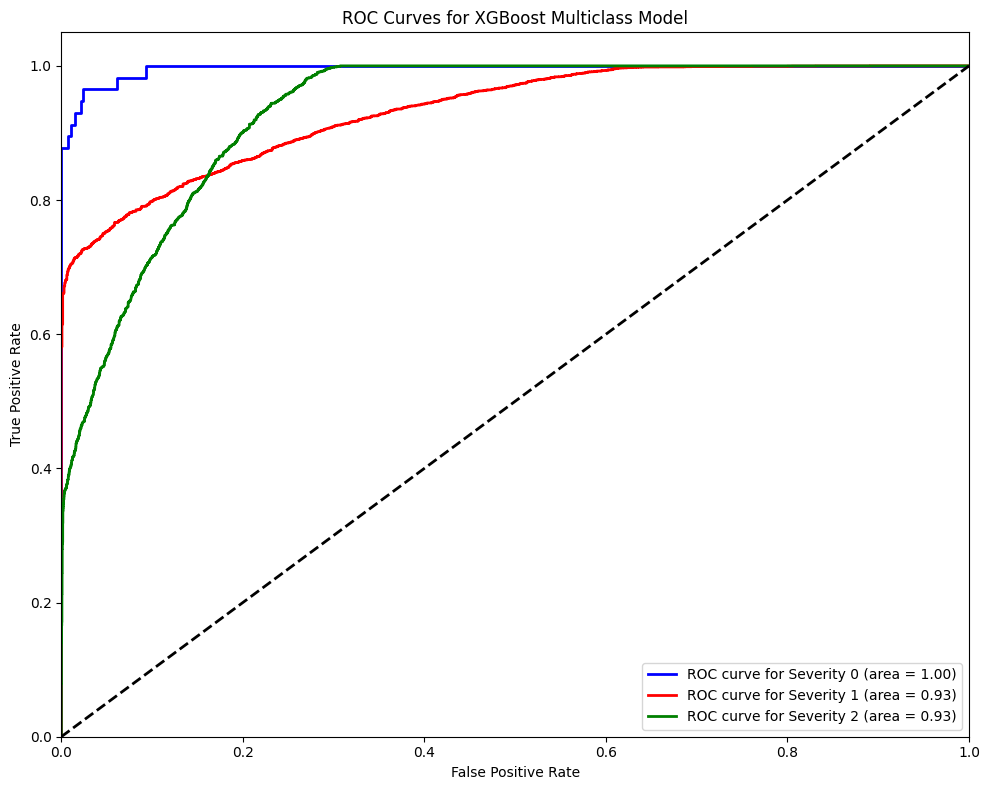

In [34]:
# XGBoost model implementation for cluster-based data (dfc)
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import inspect

# --- 1. Prepare data ---
X_train_xgb = X_train_c.copy()
X_test_xgb = X_test_c.copy()

# Encode categorical features
cat_cols = X_train_xgb.select_dtypes(include=['object', 'category']).columns
encoders_xgb = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train_xgb[col] = le.fit_transform(X_train_xgb[col])
    X_test_xgb[col] = le.transform(X_test_xgb[col])
    encoders_xgb[col] = le

# --- 2. Model training ---
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    random_state=42,
    n_estimators=500
)

print("Training XGBoost model...")

# Check if early_stopping_rounds is in fit() signature
if 'early_stopping_rounds' in inspect.signature(xgb_model.fit).parameters:
    # Newer XGBoost — supports early stopping in sklearn API
    xgb_model.fit(
        X_train_xgb, 
        y_train_c,
        eval_set=[(X_test_xgb, y_test_c)],
        eval_metric="mlogloss",
        early_stopping_rounds=50,
        verbose=True
    )
else:
    # Older XGBoost — use DMatrix + train()
    dtrain = xgb.DMatrix(X_train_xgb, label=y_train_c)
    dtest = xgb.DMatrix(X_test_xgb, label=y_test_c)
    params = {
        'objective': 'multi:softprob',
        'num_class': 3,
        'learning_rate': 0.1,
        'max_depth': 6,
        'min_child_weight': 1,
        'gamma': 0,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'eval_metric': 'mlogloss'
    }
    xgb_model = xgb.train(
        params,
        dtrain,
        num_boost_round=500,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        early_stopping_rounds=50
    )

# --- 3. Predictions ---
if isinstance(xgb_model, xgb.XGBClassifier):
    y_pred_xgb = xgb_model.predict(X_test_xgb)
    y_proba_xgb = xgb_model.predict_proba(X_test_xgb)
else:
    y_proba_xgb = xgb_model.predict(xgb.DMatrix(X_test_xgb))
    y_pred_xgb = np.argmax(y_proba_xgb, axis=1)

# --- 4. Evaluation ---
cm_xgb = confusion_matrix(y_test_c, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_c)))],
            yticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_c)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost (Cluster-based)')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_xgb))
accuracy_xgb = accuracy_score(y_test_c, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")

# --- 5. Feature Importance ---
if isinstance(xgb_model, xgb.XGBClassifier):
    feature_importance_xgb = pd.DataFrame({
        'Feature': X_train_xgb.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=False)
else:
    feature_importance_xgb = pd.DataFrame({
        'Feature': X_train_xgb.columns,
        'Importance': xgb_model.get_score(importance_type='weight').values()
    })

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb.head(15))
plt.title('Top 15 Feature Importance in XGBoost Model')
plt.tight_layout()
plt.show()

# --- 6. ROC Curves ---
plt.figure(figsize=(10, 8))
classes = np.unique(y_test_c)
colors = ['blue', 'red', 'green']
lw = 2
for i, color in zip(range(len(classes)), colors):
    y_true_binary = (y_test_c == i).astype(int)
    y_score = y_proba_xgb[:, i]
    fpr, tpr, _ = roc_curve(y_true_binary, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=lw,
             label=f'ROC curve for Severity {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost Multiclass Model')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Applied hash encoding to zone_id
Training XGBoost model...
[0]	train-mlogloss:1.00209	eval-mlogloss:1.00271
[1]	train-mlogloss:0.92374	eval-mlogloss:0.92546
[2]	train-mlogloss:0.84673	eval-mlogloss:0.84893
[3]	train-mlogloss:0.78043	eval-mlogloss:0.78285
[4]	train-mlogloss:0.73191	eval-mlogloss:0.73511
[5]	train-mlogloss:0.68805	eval-mlogloss:0.69198
[6]	train-mlogloss:0.63923	eval-mlogloss:0.64292
[7]	train-mlogloss:0.60004	eval-mlogloss:0.60377
[8]	train-mlogloss:0.56217	eval-mlogloss:0.56573
[9]	train-mlogloss:0.53098	eval-mlogloss:0.53466
[10]	train-mlogloss:0.50127	eval-mlogloss:0.50478
[11]	train-mlogloss:0.47875	eval-mlogloss:0.48248
[12]	train-mlogloss:0.45825	eval-mlogloss:0.46216
[13]	train-mlogloss:0.44132	eval-mlogloss:0.44560
[14]	train-mlogloss:0.42552	eval-mlogloss:0.42992
[15]	train-mlogloss:0.41175	eval-mlogloss:0.41653
[16]	train-mlogloss:0.40209	eval-mlogloss:0.40731
[17]	train-mlogloss:0.38604	eval-mlogloss:0.39113
[18]	train-mlogloss:0.37801	eval-mlogloss:0.38374
[

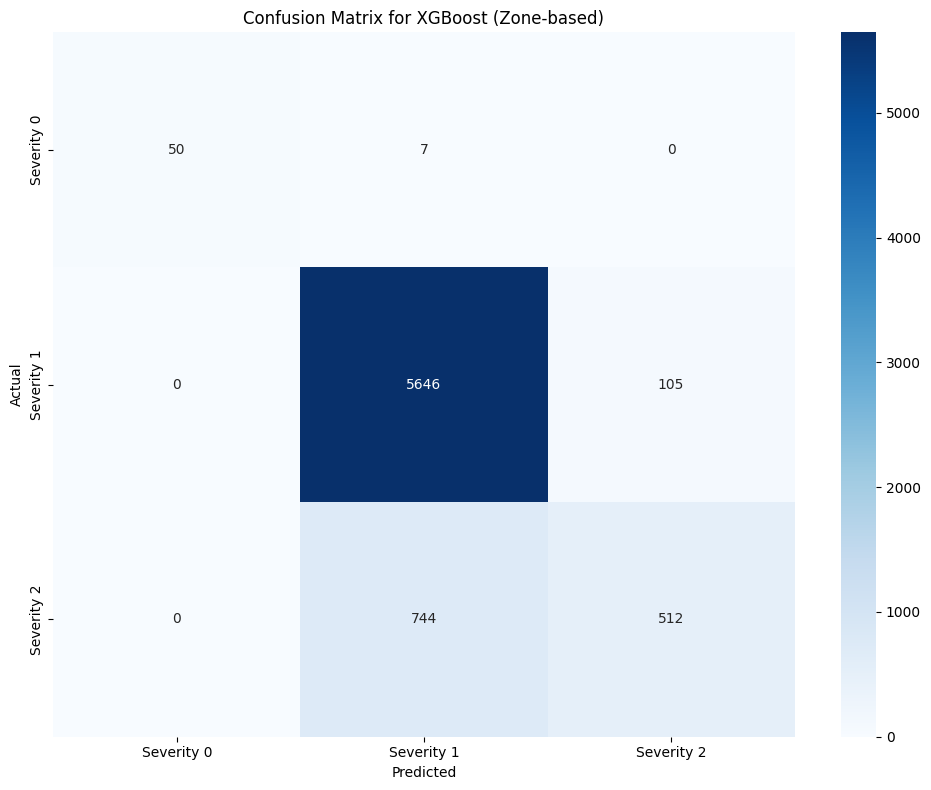


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        57
         1.0       0.88      0.98      0.93      5751
         2.0       0.83      0.41      0.55      1256

    accuracy                           0.88      7064
   macro avg       0.90      0.76      0.80      7064
weighted avg       0.87      0.88      0.86      7064

Accuracy: 0.8788


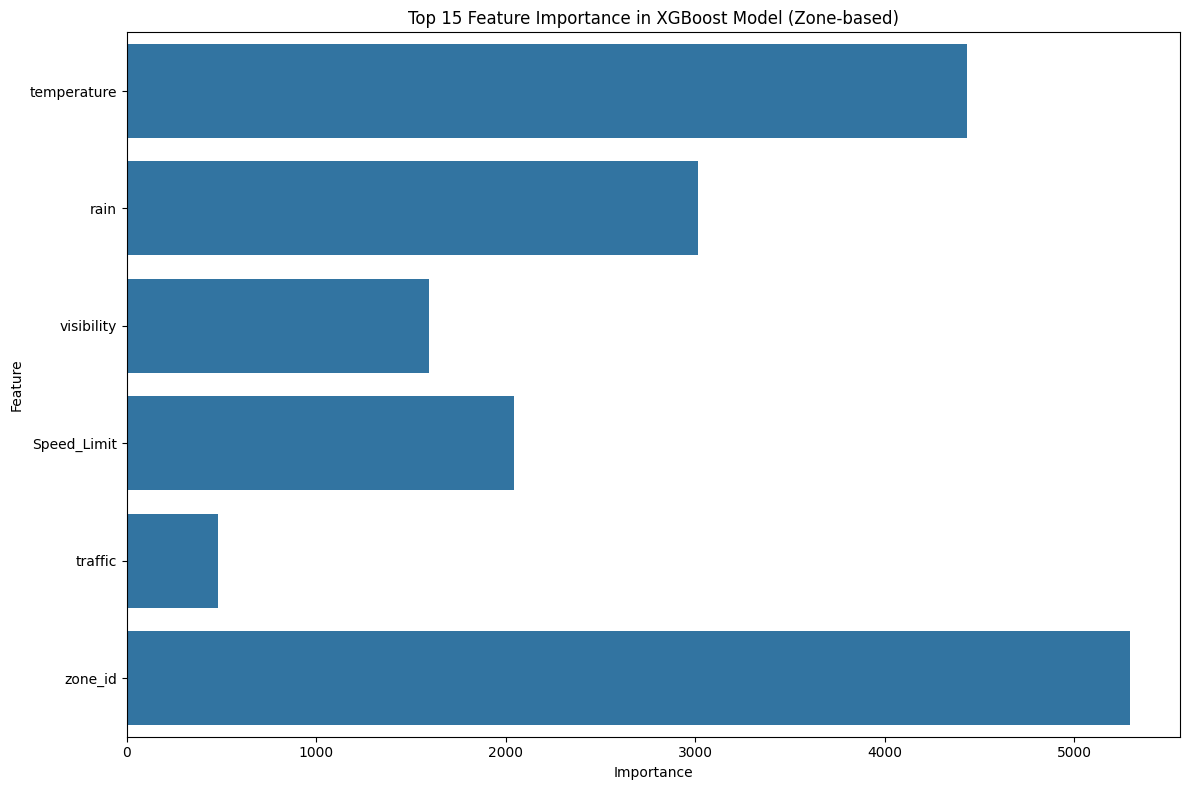

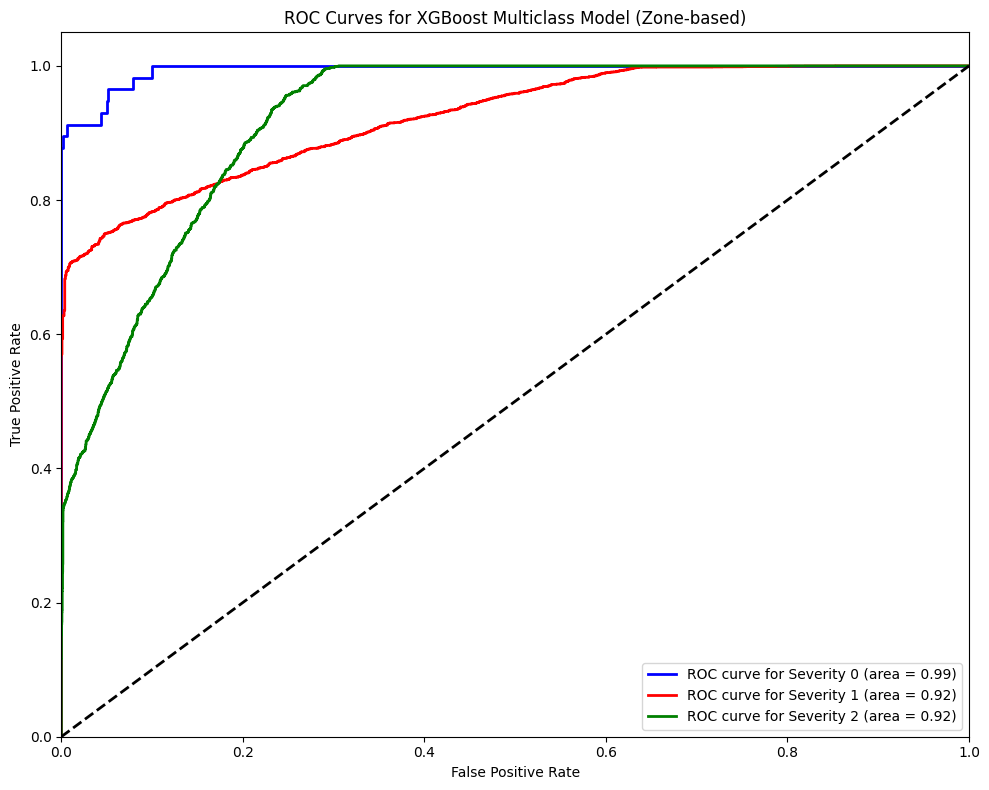

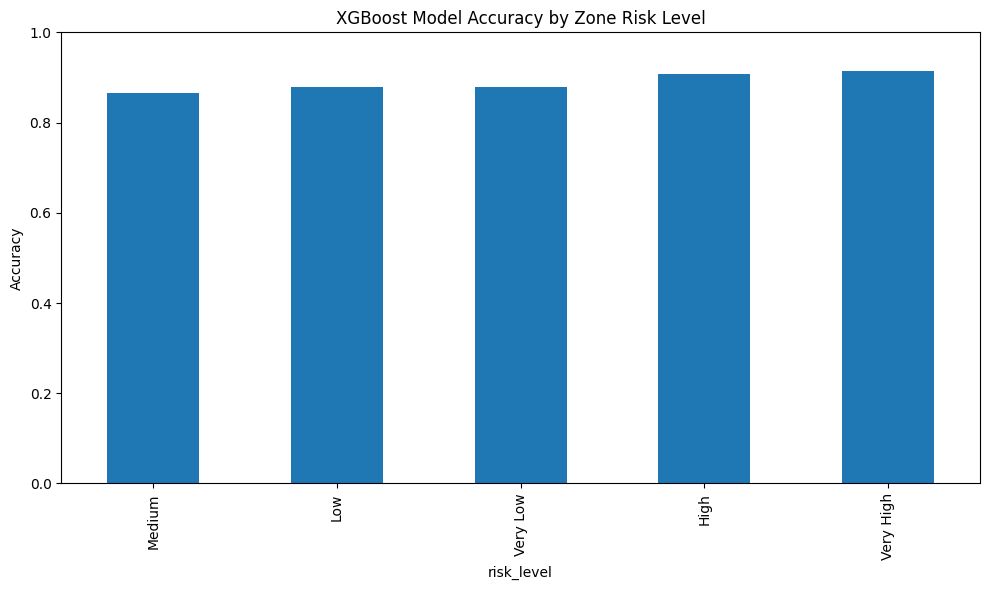


Accuracy by Risk Level:
            Accuracy  Count
risk_level                 
High        0.906863    204
Low         0.877725   1055
Medium      0.866538    517
Very High   0.914634     82
Very Low    0.878602   5206


In [35]:
# XGBoost model implementation for zone-based data (dfz)
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import inspect
import hashlib

# --- 1. Prepare data ---
X_train_xgb = X_train_z.copy()
X_test_xgb = X_test_z.copy()

# Special handling for zone_id if it exists (hash encoding)
if 'zone_id' in X_train_xgb.columns:
    # Hash encoding for zone_id
    X_train_xgb['zone_id'] = [int(hashlib.md5(str(v).encode()).hexdigest(), 16) % 10000000 for v in X_train_xgb['zone_id']]
    X_test_xgb['zone_id'] = [int(hashlib.md5(str(v).encode()).hexdigest(), 16) % 10000000 for v in X_test_xgb['zone_id']]
    print(f"Applied hash encoding to zone_id")

# Encode other categorical features
cat_cols = X_train_xgb.select_dtypes(include=['object', 'category']).columns
encoders_xgb = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train_xgb[col] = le.fit_transform(X_train_xgb[col])
    X_test_xgb[col] = le.transform(X_test_xgb[col])
    encoders_xgb[col] = le

# --- 2. Model training ---
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    random_state=42,
    n_estimators=500
)

print("Training XGBoost model...")

# Check if early_stopping_rounds is in fit() signature
if 'early_stopping_rounds' in inspect.signature(xgb_model.fit).parameters:
    # Newer XGBoost — supports early stopping in sklearn API
    xgb_model.fit(
        X_train_xgb, 
        y_train_z,
        eval_set=[(X_test_xgb, y_test_z)],
        eval_metric="mlogloss",
        early_stopping_rounds=50,
        verbose=True
    )
else:
    # Older XGBoost — use DMatrix + train()
    dtrain = xgb.DMatrix(X_train_xgb, label=y_train_z)
    dtest = xgb.DMatrix(X_test_xgb, label=y_test_z)
    params = {
        'objective': 'multi:softprob',
        'num_class': 3,
        'learning_rate': 0.1,
        'max_depth': 6,
        'min_child_weight': 1,
        'gamma': 0,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'eval_metric': 'mlogloss'
    }
    xgb_model = xgb.train(
        params,
        dtrain,
        num_boost_round=500,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        early_stopping_rounds=50
    )

# --- 3. Predictions ---
if isinstance(xgb_model, xgb.XGBClassifier):
    y_pred_xgb = xgb_model.predict(X_test_xgb)
    y_proba_xgb = xgb_model.predict_proba(X_test_xgb)
else:
    y_proba_xgb = xgb_model.predict(xgb.DMatrix(X_test_xgb))
    y_pred_xgb = np.argmax(y_proba_xgb, axis=1)

# --- 4. Evaluation ---
cm_xgb = confusion_matrix(y_test_z, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_z)))],
            yticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_z)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost (Zone-based)')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_z, y_pred_xgb))
accuracy_xgb = accuracy_score(y_test_z, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")

# --- 5. Feature Importance ---
if isinstance(xgb_model, xgb.XGBClassifier):
    feature_importance_xgb = pd.DataFrame({
        'Feature': X_train_xgb.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=False)
else:
    feature_importance_xgb = pd.DataFrame({
        'Feature': X_train_xgb.columns,
        'Importance': xgb_model.get_score(importance_type='weight').values()
    })

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb.head(15))
plt.title('Top 15 Feature Importance in XGBoost Model (Zone-based)')
plt.tight_layout()
plt.show()

# --- 6. ROC Curves ---
plt.figure(figsize=(10, 8))
classes = np.unique(y_test_z)
colors = ['blue', 'red', 'green']
lw = 2
for i, color in zip(range(len(classes)), colors):
    y_true_binary = (y_test_z == i).astype(int)
    y_score = y_proba_xgb[:, i]
    fpr, tpr, _ = roc_curve(y_true_binary, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=lw,
             label=f'ROC curve for Severity {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost Multiclass Model (Zone-based)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# --- 7. Analysis by Risk Level (if zone_risk_dict is available) ---
try:
    # Save original test data for analysis
    X_test_orig = X_test_z.copy()
    
    # Create a DataFrame with original zone_id values for analysis
    zone_performance = pd.DataFrame({
        'zone_id': X_test_orig['zone_id'].values,
        'actual': y_test_z,
        'predicted': y_pred_xgb,
        'correct': y_test_z == y_pred_xgb
    })
    
    # Add risk level information using zone_risk_dict
    zone_performance['risk_level'] = zone_performance['zone_id'].map(lambda x: zone_risk_dict.get(x, 'Unknown'))
    
    # Calculate accuracy by risk level
    risk_accuracy = zone_performance.groupby('risk_level')['correct'].mean().sort_values()
    
    plt.figure(figsize=(10, 6))
    risk_accuracy.plot(kind='bar')
    plt.title('XGBoost Model Accuracy by Zone Risk Level')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
    
    print("\nAccuracy by Risk Level:")
    counts = zone_performance.groupby('risk_level')['correct'].count()
    risk_report = pd.DataFrame({
        'Accuracy': risk_accuracy,
        'Count': counts
    })
    print(risk_report)
except Exception as e:
    print(f"Risk level analysis not available: {e}")

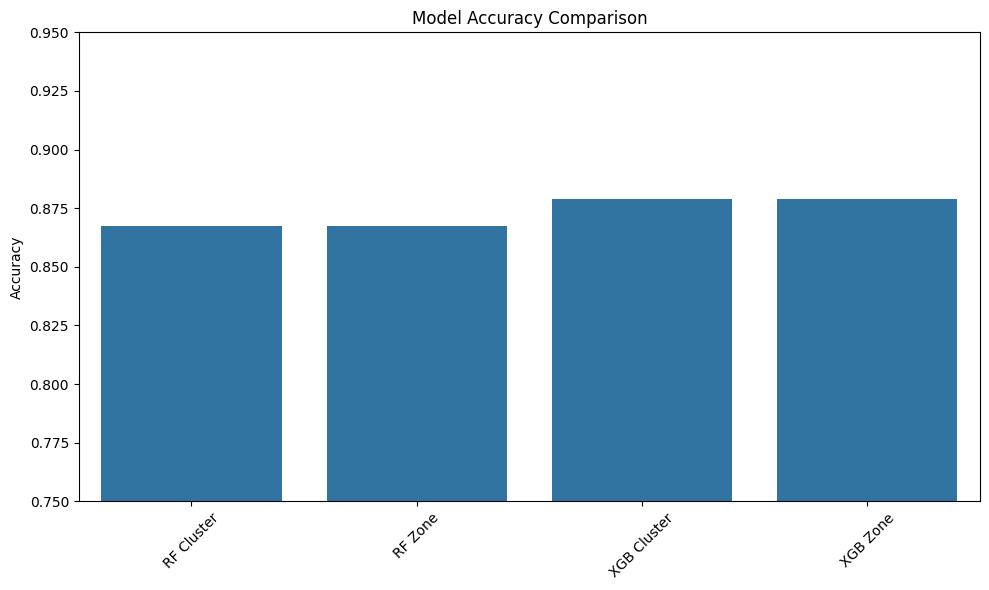

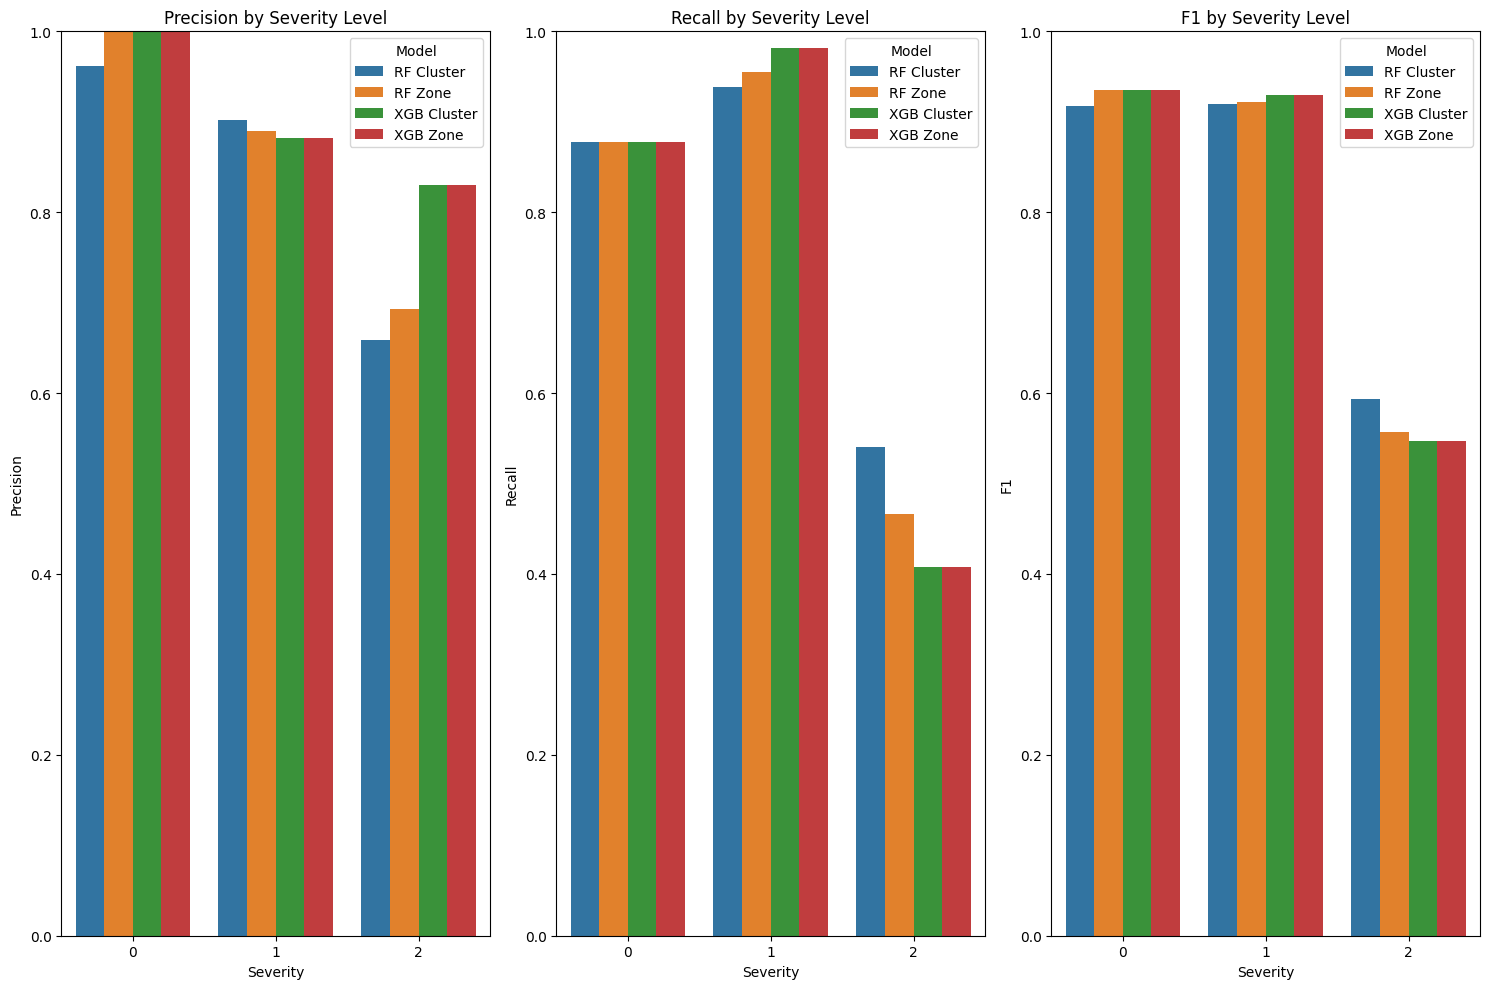

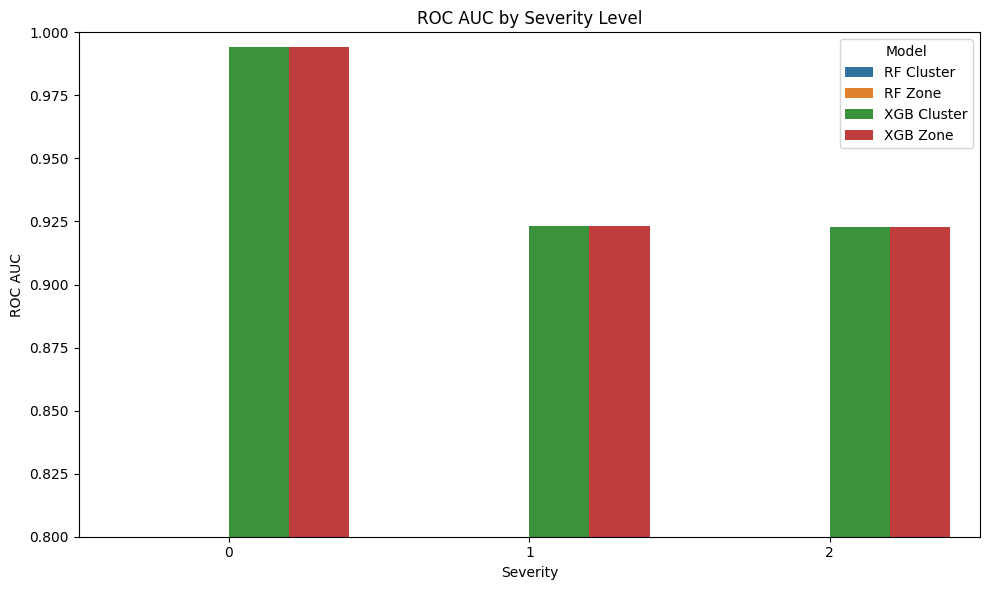

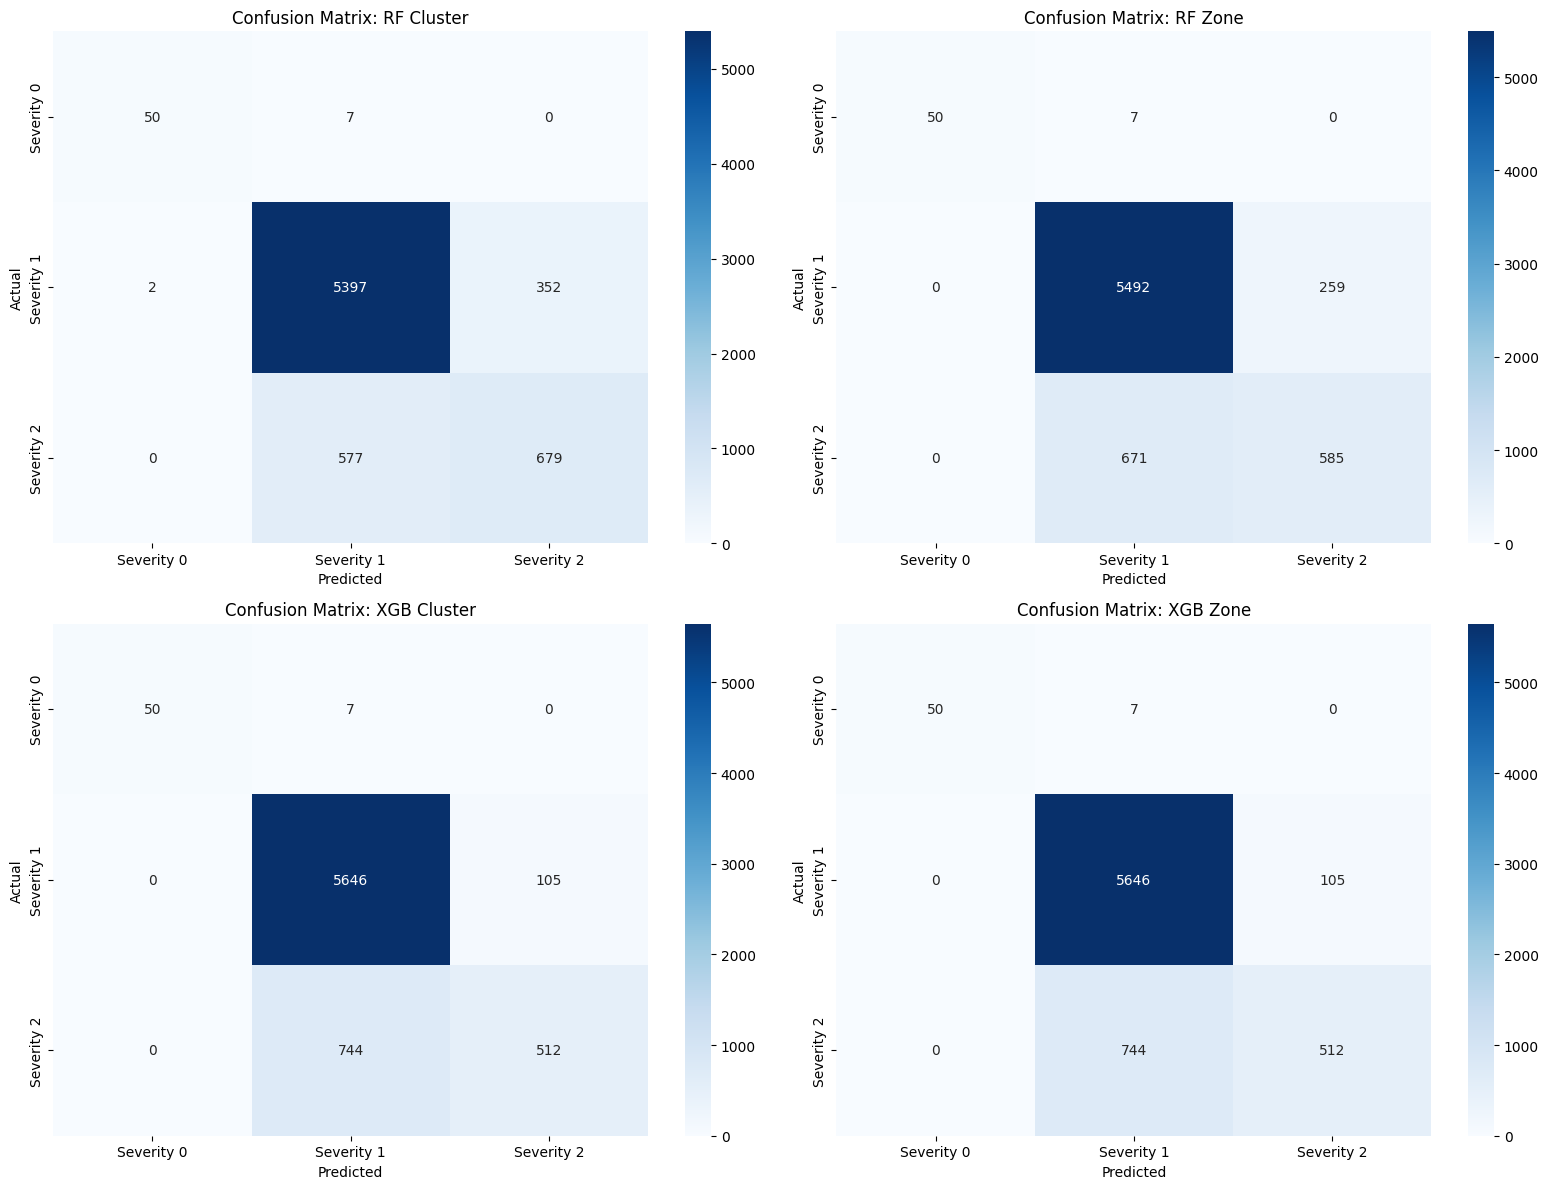

MODEL PERFORMANCE SUMMARY
             Accuracy  Mean F1  Mean ROC AUC  Precision (Severity 0)  \
RF Cluster     0.8672   0.8104           NaN                  0.9615   
RF Zone        0.8674   0.8044           NaN                  1.0000   
XGB Cluster    0.8788   0.8036        0.9467                  1.0000   
XGB Zone       0.8788   0.8036        0.9467                  1.0000   

             Precision (Severity 1)  Precision (Severity 2)  \
RF Cluster                   0.9024                  0.6586   
RF Zone                      0.8901                  0.6931   
XGB Cluster                  0.8826                  0.8298   
XGB Zone                     0.8826                  0.8298   

             Recall (Severity 0)  Recall (Severity 1)  Recall (Severity 2)  \
RF Cluster                0.8772               0.9384               0.5406   
RF Zone                   0.8772               0.9550               0.4658   
XGB Cluster               0.8772               0.9817          

<Figure size 1200x600 with 0 Axes>

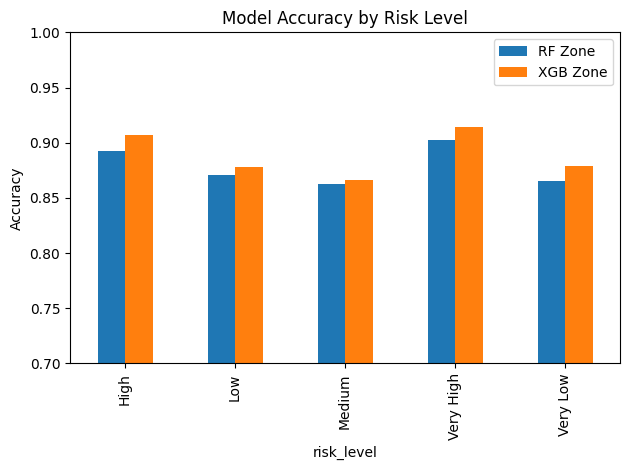


ACCURACY BY RISK LEVEL
            RF Zone  XGB Zone
risk_level                   
High         0.8922    0.9069
Low          0.8711    0.8777
Medium       0.8627    0.8665
Very High    0.9024    0.9146
Very Low     0.8655    0.8786

TOP 5 FEATURES BY MODEL
RF Cluster: traffic, temperature, Speed_Limit, cluster_zone, rain
RF Zone: traffic, temperature, zone_id, Speed_Limit, rain


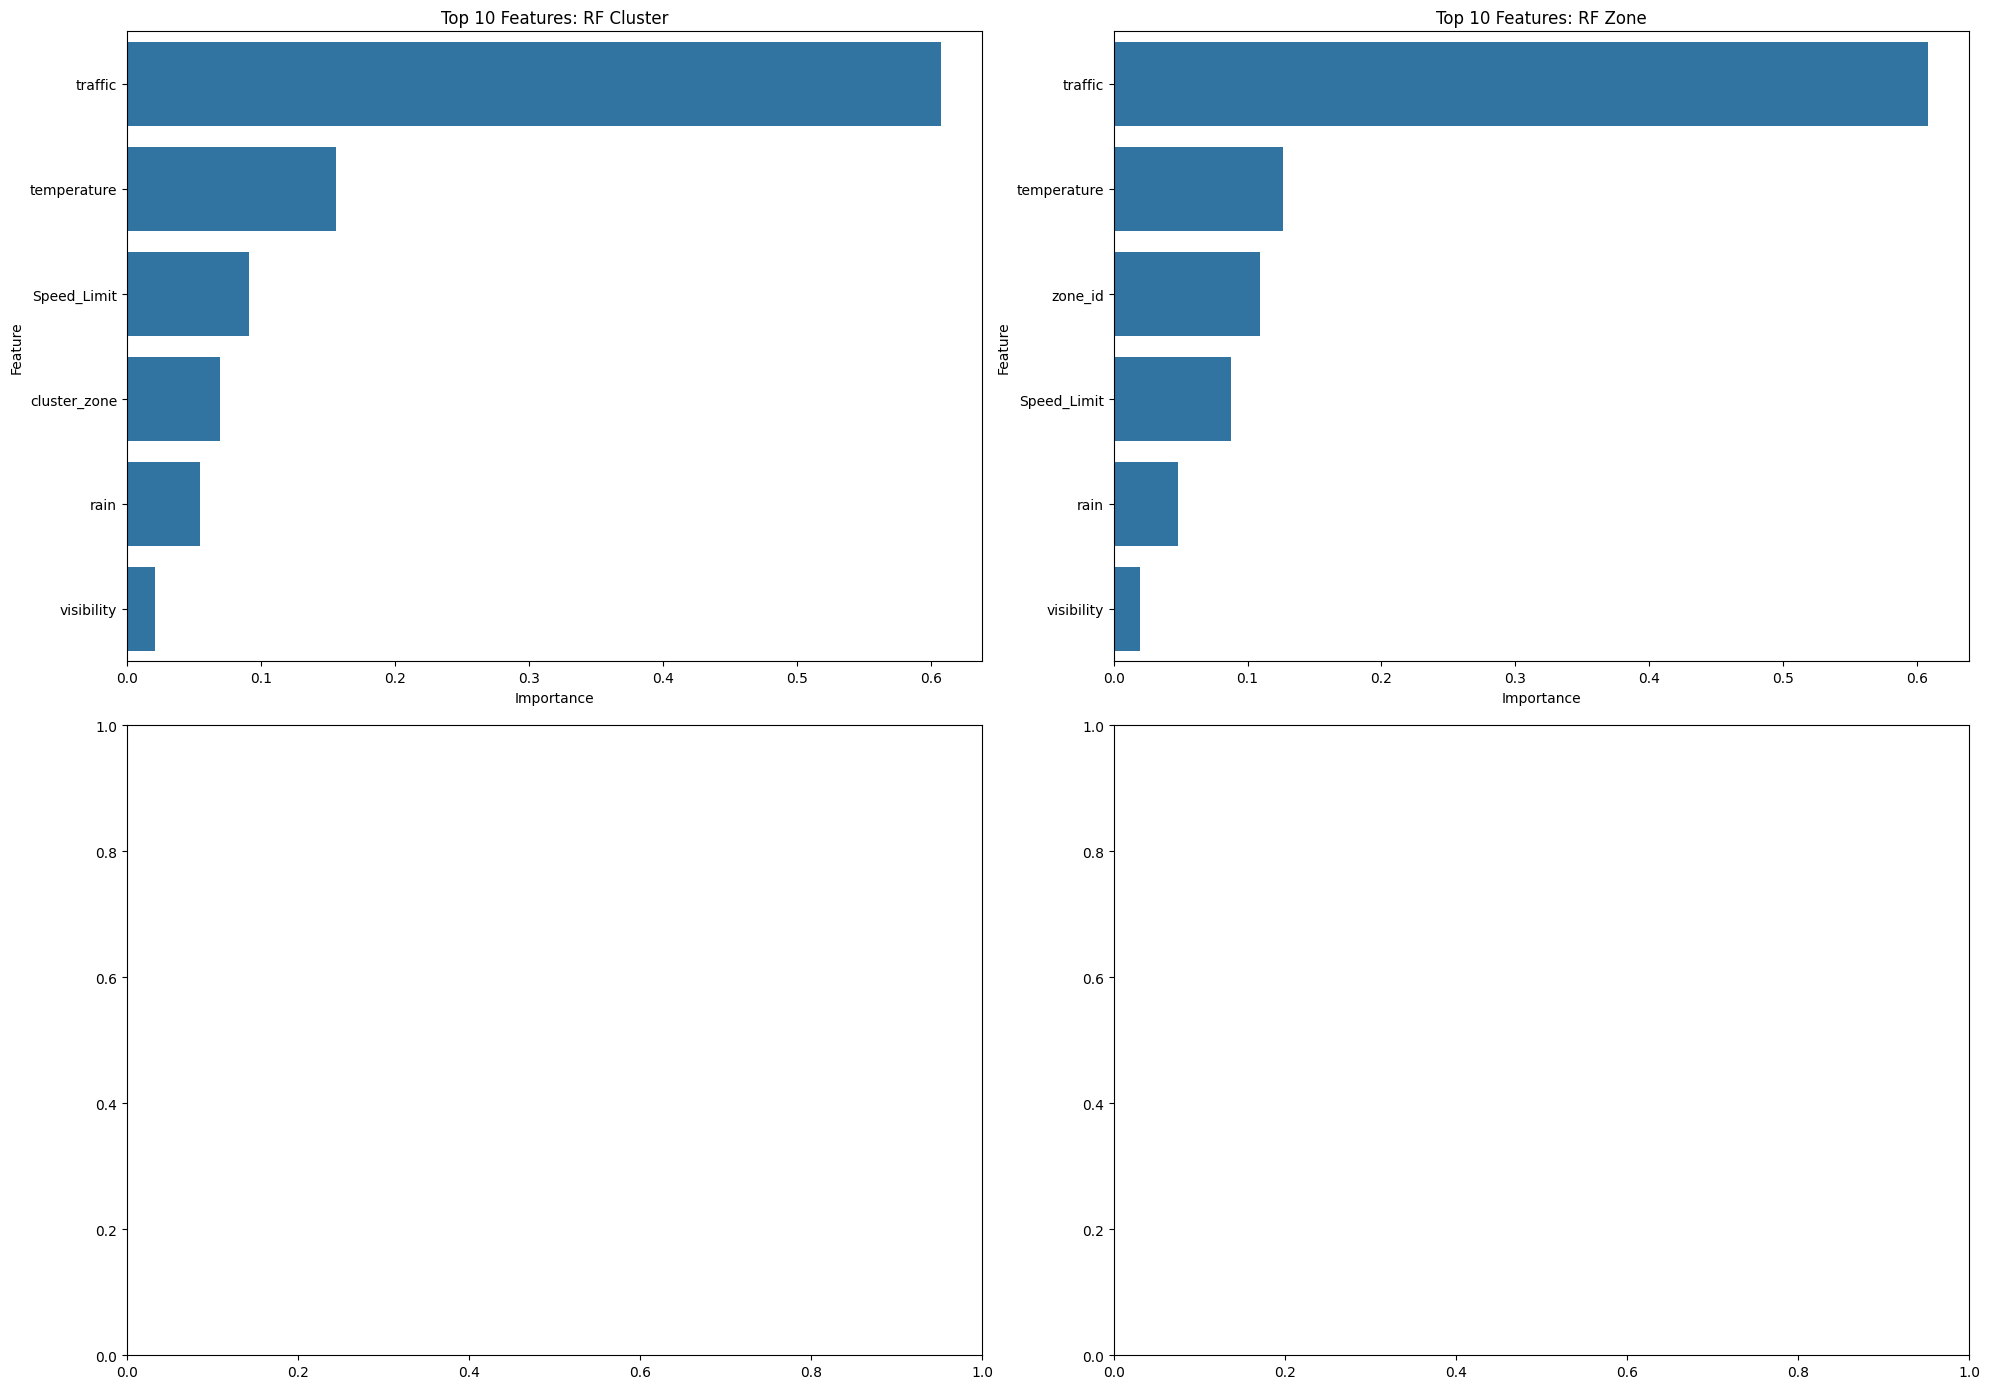


MODEL COMPARISON CONCLUSION
Best model by accuracy: XGB Cluster (0.8788)
Best model by mean F1 score: RF Cluster (0.8104)
Best model by mean ROC AUC: XGB Cluster (0.9467)

Severity 0:
  Best precision: RF Zone (1.0000)
  Best recall: RF Cluster (0.8772)
  Best F1: RF Zone (0.9346)

Severity 1:
  Best precision: RF Cluster (0.9024)
  Best recall: XGB Cluster (0.9817)
  Best F1: XGB Cluster (0.9295)

Severity 2:
  Best precision: XGB Cluster (0.8298)
  Best recall: RF Cluster (0.5406)
  Best F1: RF Cluster (0.5938)


In [36]:
# Comprehensive model comparison
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc
from time import time

# Create a function to ensure we can handle either XGBoost or Random Forest models
def get_predictions(model, X_test, is_xgb=False):
    if is_xgb and not isinstance(model, xgb.XGBClassifier):
        # Handle core XGBoost model
        dtest = xgb.DMatrix(X_test)
        y_proba = model.predict(dtest)
        y_pred = np.argmax(y_proba, axis=1)
        return y_pred, y_proba
    else:
        # Handle sklearn-compatible models
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        return y_pred, y_proba

# 1. COLLECT MODEL RESULTS
# Dictionary to store all model information
models = {
    "RF Cluster": {
        "model": rf_model,
        "X_test": X_test_c,
        "y_test": y_test_c,
        "y_pred": y_pred_c,
        "is_xgb": False
    },
    "RF Zone": {
        "model": rf_model_z,
        "X_test": X_test_z_enc,  # Using encoded version
        "y_test": y_test_z,
        "y_pred": y_pred_z,
        "is_xgb": False
    },
    "XGB Cluster": {
        "model": xgb_model,  # From the cluster-based XGBoost
        "X_test": X_test_xgb, # From the cluster XGBoost code
        "y_test": y_test_c,
        "is_xgb": True
    },
    "XGB Zone": {
        "model": xgb_model, # From the zone-based XGBoost (last run)
        "X_test": X_test_xgb, # From the zone XGBoost code (last run)
        "y_test": y_test_z,
        "is_xgb": True
    }
}

# Get predictions for the XGBoost models (in case they're not stored)
for name, info in models.items():
    if "y_pred" not in info:
        y_pred, y_proba = get_predictions(
            info["model"], info["X_test"], info["is_xgb"]
        )
        models[name]["y_pred"] = y_pred
        models[name]["y_proba"] = y_proba

# 2. CALCULATE PERFORMANCE METRICS
metrics = {}
for name, info in models.items():
    # Basic metrics
    accuracy = accuracy_score(info["y_test"], info["y_pred"])
    precision, recall, f1, _ = precision_recall_fscore_support(
        info["y_test"], info["y_pred"], average=None
    )
    
    # ROC AUC for each class
    y_test = info["y_test"]
    y_proba = info.get("y_proba", None)
    if y_proba is not None:
        roc_auc_scores = []
        for i in range(len(np.unique(y_test))):
            y_true_binary = (y_test == i).astype(int)
            y_score = y_proba[:, i]
            fpr, tpr, _ = roc_curve(y_true_binary, y_score)
            roc_auc_scores.append(auc(fpr, tpr))
    else:
        roc_auc_scores = [np.nan, np.nan, np.nan]
    
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc_scores
    }

# 3. VISUALIZATIONS

# 3.1 Overall Accuracy Comparison
plt.figure(figsize=(10, 6))
accuracies = [metrics[name]["Accuracy"] for name in models.keys()]
sns.barplot(x=list(models.keys()), y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.95)  # Adjust based on your actual accuracy range
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.2 Precision, Recall, F1 by Severity Level
severity_levels = range(3)  # 0, 1, 2
metrics_by_severity = pd.DataFrame()

for name in models.keys():
    for severity in severity_levels:
        row = {
            'Model': name,
            'Severity': severity,
            'Precision': metrics[name]['Precision'][severity],
            'Recall': metrics[name]['Recall'][severity],
            'F1': metrics[name]['F1'][severity]
        }
        metrics_by_severity = pd.concat([metrics_by_severity, pd.DataFrame([row])], ignore_index=True)

# Plot metrics by severity
plt.figure(figsize=(15, 10))
for i, metric in enumerate(['Precision', 'Recall', 'F1']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Severity', y=metric, hue='Model', data=metrics_by_severity)
    plt.title(f'{metric} by Severity Level')
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 3.3 ROC AUC Comparison
plt.figure(figsize=(10, 6))
roc_auc_data = []
for name in models.keys():
    for i, score in enumerate(metrics[name]['ROC AUC']):
        roc_auc_data.append({
            'Model': name,
            'Severity': i,
            'ROC AUC': score
        })
roc_auc_df = pd.DataFrame(roc_auc_data)
sns.barplot(x='Severity', y='ROC AUC', hue='Model', data=roc_auc_df)
plt.title('ROC AUC by Severity Level')
plt.ylim(0.8, 1)  # Adjust based on your actual ROC AUC range
plt.tight_layout()
plt.show()

# 3.4 Confusion Matrix Comparison (heatmap grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (name, info) in enumerate(models.items()):
    cm = confusion_matrix(info["y_test"], info["y_pred"])
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=[f'Severity {i}' for i in range(len(np.unique(info["y_test"])))],
                yticklabels=[f'Severity {i}' for i in range(len(np.unique(info["y_test"])))])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix: {name}')

plt.tight_layout()
plt.show()

# 4. STATISTICAL COMPARISON

# 4.1 Create a summary DataFrame
summary = pd.DataFrame({
    'Accuracy': [metrics[name]['Accuracy'] for name in models.keys()],
    'Mean F1': [np.mean(metrics[name]['F1']) for name in models.keys()],
    'Mean ROC AUC': [np.mean(metrics[name]['ROC AUC']) for name in models.keys()],
    'Precision (Severity 0)': [metrics[name]['Precision'][0] for name in models.keys()],
    'Precision (Severity 1)': [metrics[name]['Precision'][1] for name in models.keys()],
    'Precision (Severity 2)': [metrics[name]['Precision'][2] for name in models.keys()],
    'Recall (Severity 0)': [metrics[name]['Recall'][0] for name in models.keys()],
    'Recall (Severity 1)': [metrics[name]['Recall'][1] for name in models.keys()],
    'Recall (Severity 2)': [metrics[name]['Recall'][2] for name in models.keys()],
    'F1 (Severity 0)': [metrics[name]['F1'][0] for name in models.keys()],
    'F1 (Severity 1)': [metrics[name]['F1'][1] for name in models.keys()],
    'F1 (Severity 2)': [metrics[name]['F1'][2] for name in models.keys()],
    'ROC AUC (Severity 0)': [metrics[name]['ROC AUC'][0] for name in models.keys()],
    'ROC AUC (Severity 1)': [metrics[name]['ROC AUC'][1] for name in models.keys()],
    'ROC AUC (Severity 2)': [metrics[name]['ROC AUC'][2] for name in models.keys()],
}, index=models.keys())

# Display the summary table
print("MODEL PERFORMANCE SUMMARY")
print("========================")
print(summary.round(4))

# 4.2 Find the best model for each metric
best_model = {}
for column in summary.columns:
    if 'Accuracy' in column or 'F1' in column or 'ROC' in column:
        best_idx = summary[column].idxmax()
        best_model[column] = f"{best_idx} ({summary[column].max():.4f})"

print("\nBEST MODEL BY METRIC")
print("===================")
for metric, model in best_model.items():
    print(f"{metric}: {model}")

# 5. RISK LEVEL ANALYSIS
# Compare how models perform across risk levels (if data available)
try:
    # For zone-based models, analyze performance by risk level
    risk_metrics = {}
    
    # Get zone-based predictions and risk levels
    rf_zone_perf = pd.DataFrame({
        'zone_id': X_test_z_orig['zone_id'],
        'actual': y_test_z,
        'predicted_rf': y_pred_z,
        'correct_rf': y_test_z == y_pred_z
    })
    
    # Get XGBoost zone predictions from the latest run
    xgb_zone_perf = pd.DataFrame({
        'zone_id': X_test_z_orig['zone_id'],
        'actual': y_test_z,
        'predicted_xgb': models['XGB Zone']['y_pred'],
        'correct_xgb': y_test_z == models['XGB Zone']['y_pred']
    })
    
    # Map to risk levels
    rf_zone_perf['risk_level'] = rf_zone_perf['zone_id'].map(lambda x: zone_risk_dict.get(x, 'Unknown'))
    xgb_zone_perf['risk_level'] = xgb_zone_perf['zone_id'].map(lambda x: zone_risk_dict.get(x, 'Unknown'))
    
    # Calculate accuracy by risk level
    rf_risk_acc = rf_zone_perf.groupby('risk_level')['correct_rf'].mean()
    xgb_risk_acc = xgb_zone_perf.groupby('risk_level')['correct_xgb'].mean()
    
    # Combine into one DataFrame
    risk_comparison = pd.DataFrame({
        'RF Zone': rf_risk_acc,
        'XGB Zone': xgb_risk_acc
    })
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    risk_comparison.plot(kind='bar')
    plt.title('Model Accuracy by Risk Level')
    plt.ylabel('Accuracy')
    plt.ylim(0.7, 1.0)
    plt.tight_layout()
    plt.show()
    
    print("\nACCURACY BY RISK LEVEL")
    print("=====================")
    print(risk_comparison.round(4))
    
except Exception as e:
    print(f"Risk level comparison not available: {e}")

# 6. FEATURE IMPORTANCE COMPARISON
try:
    # Extract feature importances from all models
    feature_importances = {}
    
    # RF Cluster
    feature_importances['RF Cluster'] = pd.DataFrame({
        'Feature': X_train_c.columns,
        'Importance': models['RF Cluster']['model'].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # RF Zone
    feature_importances['RF Zone'] = pd.DataFrame({
        'Feature': X_train_z_enc.columns,
        'Importance': models['RF Zone']['model'].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # XGB Cluster
    if isinstance(models['XGB Cluster']['model'], xgb.XGBClassifier):
        feature_importances['XGB Cluster'] = pd.DataFrame({
            'Feature': X_train_xgb.columns,  # From the cluster XGBoost code
            'Importance': models['XGB Cluster']['model'].feature_importances_
        }).sort_values('Importance', ascending=False)
    
    # XGB Zone (assuming it's the last model trained)
    if isinstance(models['XGB Zone']['model'], xgb.XGBClassifier):
        # Use the feature names from the most recent XGBoost run
        feature_importances['XGB Zone'] = pd.DataFrame({
            'Feature': X_train_xgb.columns,  # From the zone XGBoost code
            'Importance': models['XGB Zone']['model'].feature_importances_
        }).sort_values('Importance', ascending=False)
    
    # Get the top 5 features from each model
    top_features = {}
    for model_name, fi_df in feature_importances.items():
        top_features[model_name] = fi_df.head(5)['Feature'].tolist()
    
    # Print top features by model
    print("\nTOP 5 FEATURES BY MODEL")
    print("=====================")
    for model_name, features in top_features.items():
        print(f"{model_name}: {', '.join(features)}")
    
    # Plot top 10 features for all models
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))
    axes = axes.flatten()
    
    for i, (model_name, fi_df) in enumerate(feature_importances.items()):
        ax = axes[i]
        sns.barplot(x='Importance', y='Feature', data=fi_df.head(10), ax=ax)
        ax.set_title(f'Top 10 Features: {model_name}')
        ax.set_xlabel('Importance')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Feature importance comparison not available: {e}")

# 7. CONCLUSION - Summarize the best model based on different criteria
print("\nMODEL COMPARISON CONCLUSION")
print("=========================")

# Overall best model
best_accuracy_model = summary['Accuracy'].idxmax()
best_f1_model = summary['Mean F1'].idxmax()
best_roc_model = summary['Mean ROC AUC'].idxmax()

print(f"Best model by accuracy: {best_accuracy_model} ({summary['Accuracy'].max():.4f})")
print(f"Best model by mean F1 score: {best_f1_model} ({summary['Mean F1'].max():.4f})")
print(f"Best model by mean ROC AUC: {best_roc_model} ({summary['Mean ROC AUC'].max():.4f})")

# Best model per severity level
for severity in [0, 1, 2]:
    best_precision = summary[f'Precision (Severity {severity})'].idxmax()
    best_recall = summary[f'Recall (Severity {severity})'].idxmax()
    best_f1 = summary[f'F1 (Severity {severity})'].idxmax()
    
    print(f"\nSeverity {severity}:")
    print(f"  Best precision: {best_precision} ({summary[f'Precision (Severity {severity})'].max():.4f})")
    print(f"  Best recall: {best_recall} ({summary[f'Recall (Severity {severity})'].max():.4f})")
    print(f"  Best F1: {best_f1} ({summary[f'F1 (Severity {severity})'].max():.4f})")